# Start

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import numpy as np

In [2]:
print("pandas version:{}".format(pd.__version__))

pandas version:1.4.4


In [3]:
G = nx.read_graphml('london.graph')
print(nx.info(G))

Graph with 401 nodes and 467 edges


C:\Users\JinJiang\AppData\Local\Temp\ipykernel_27388\2455874615.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [4]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [5]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

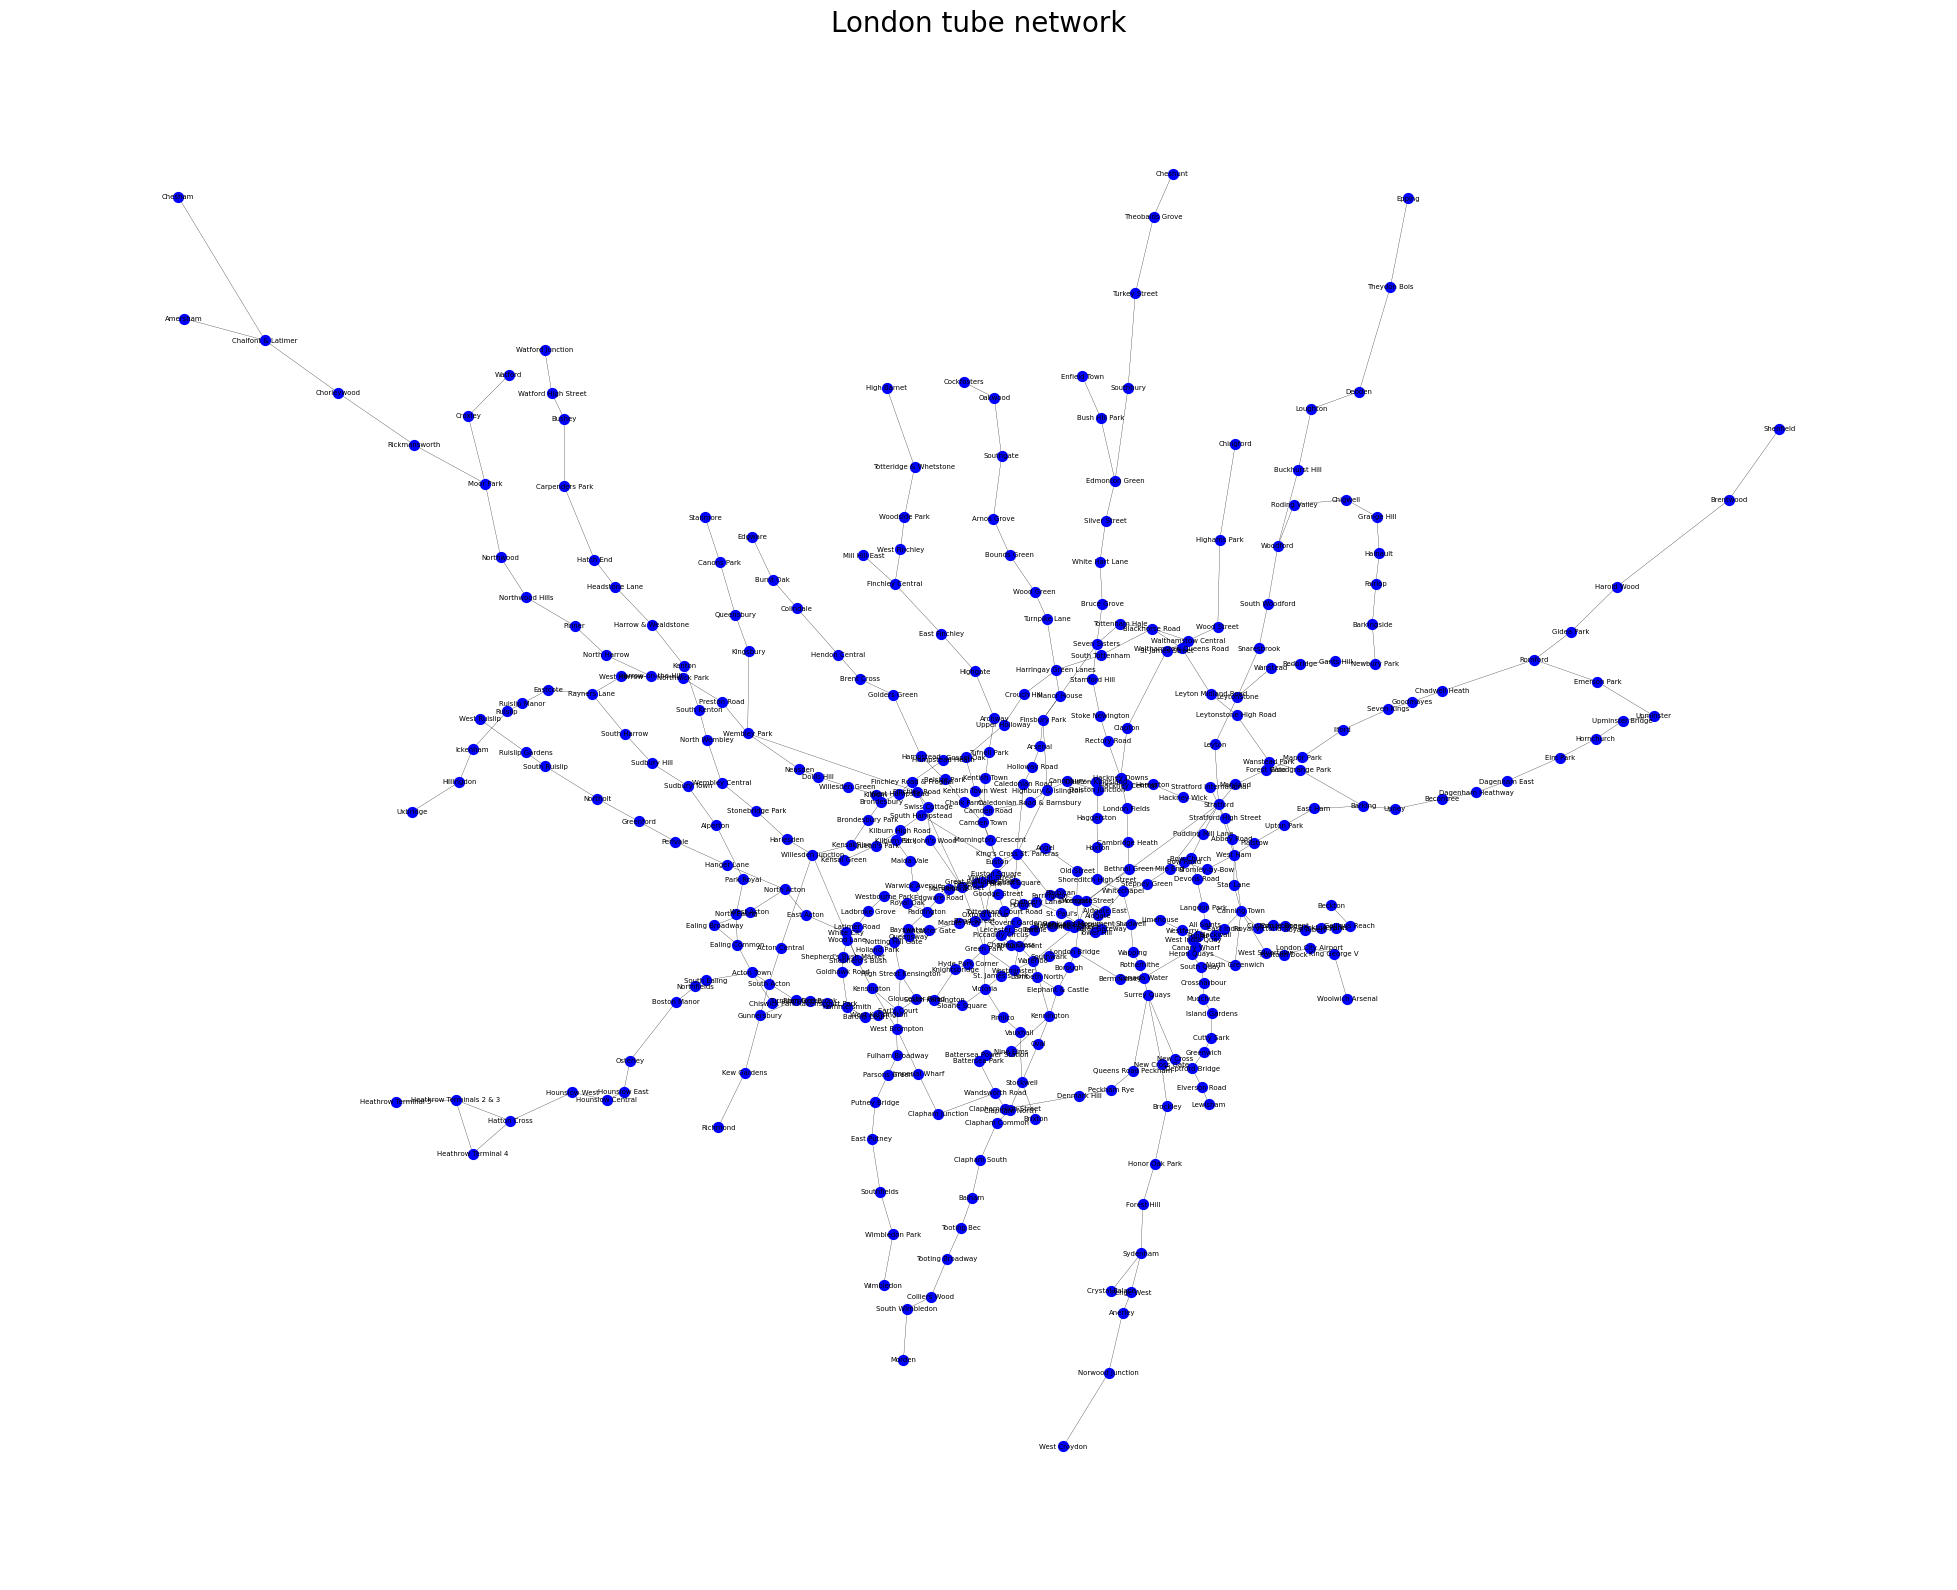

In [6]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

# node_labels = nx.get_node_attributes(G, 'station_name')
# 怎么提取node的名字，the index of the node?
node_labels = {node:node for node in G.nodes()}

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=5, font_color='black')

plt.title("London tube network",fontsize=20)
plt.axis("off")
plt.show()


# 1. Topological

##  1.1 Centrality measures
degree centrality;  
\begin{equation}
C(i)=n_{i}/N
\end{equation} 

betweenness centrality; 

\begin{equation}
c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}
\end{equation} 

closeness centrality
\begin{equation}
C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},
\end{equation} 


In [7]:
degr = nx.degree_centrality(G)
degr_n = nx.degree(G)
nx.set_node_attributes(G,dict(degr),'degree')
nx.set_node_attributes(G,dict(degr_n),'degree_n')


In [8]:
betwn = nx.betweenness_centrality(G,normalized=False)
clsn = nx.closeness_centrality(G)
nx.set_node_attributes(G,dict(betwn),'betweenness')
nx.set_node_attributes(G,dict(clsn),'closeness')


eigenv = nx.eigenvector_centrality(G, max_iter=1000)
nx.set_node_attributes(G,dict(eigenv),'eigenvector')

Centrality value To dataframe 

In [9]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))
df['degree_n'] = pd.Series(nx.get_node_attributes(G, 'degree_n'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))
# df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

### Degree Centrality

degree centrality前十中有好多0.15相同值的

In [10]:
df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree,degree_n,betweenness,closeness
Stratford,0.0225,9,23768.093434,0.104384
Bank and Monument,0.0200,8,23181.058947,0.113572
Baker Street,0.0175,7,15287.107612,0.108962
King's Cross St. Pancras,0.0175,7,20373.521465,0.113443
Earl's Court,0.0150,6,10046.207756,0.090416
Green Park,0.0150,6,17223.622114,0.114778
Waterloo,0.0150,6,19464.882323,0.112265
Liverpool Street,0.0150,6,21610.387049,0.110254
Canning Town,0.0150,6,7674.098413,0.091575
Oxford Circus,0.0150,6,4296.746032,0.111204


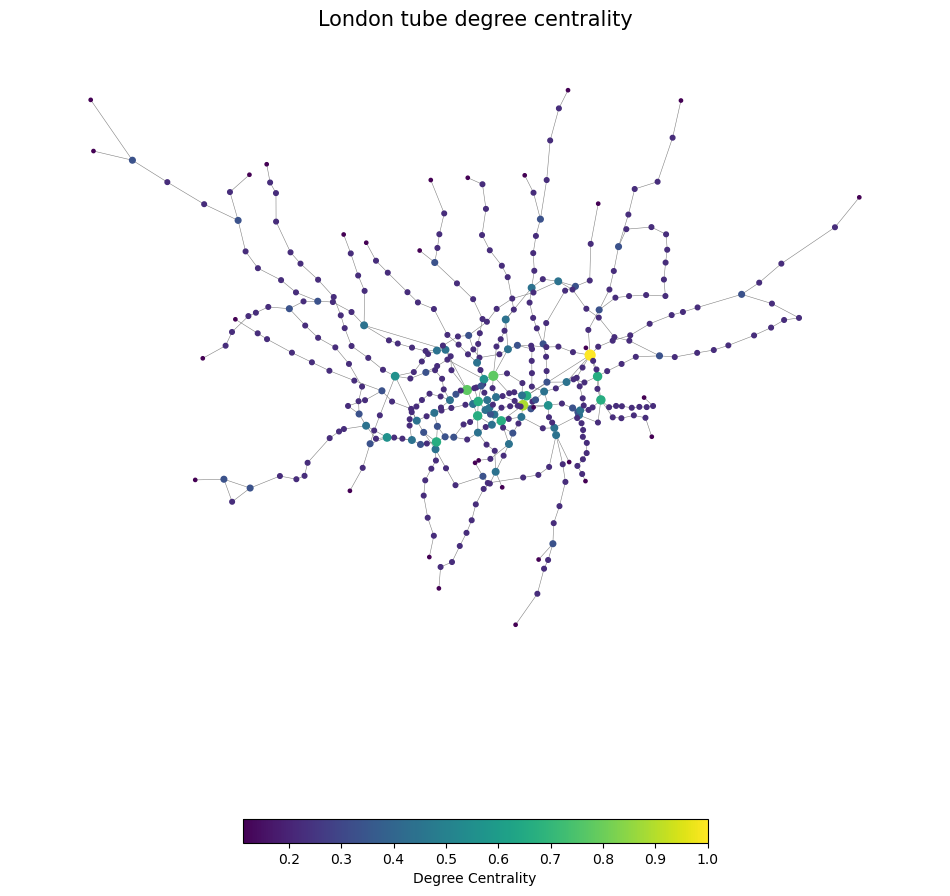

In [11]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos = nx.get_node_attributes(G, 'coords')
pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

degree centrality means 与该节点直接相连的节点的数量，公式如下。

It's a crude measure of the hubs of the network.

In the underground network, it indicates REGINONAL centers/hub.(在社交网络中就不一定，例如送报员可能是该社区link最多的节点，但不一定是社区的"大人物"). Degree centrality 高的站点是这片区域的地铁交通中心，也是人群出行活动的中心？因此 it's reasonable that 表中前十的节点分布相对分散scattered，而非聚集cluster。例如，strateford station是xxx, bank and monument station...



### Betweenness Centrality

In [12]:
df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

,degree,degree_n,betweenness,closeness
Stratford,0.0225,9,23768.093434,0.104384
Bank and Monument,0.0200,8,23181.058947,0.113572
Liverpool Street,0.0150,6,21610.387049,0.110254
King's Cross St. Pancras,0.0175,7,20373.521465,0.113443
Waterloo,0.0150,6,19464.882323,0.112265
Green Park,0.0150,6,17223.622114,0.114778
Euston,0.0125,5,16624.275469,0.109830
Westminster,0.0100,4,16226.155916,0.112549
Baker Street,0.0175,7,15287.107612,0.108962
Finchley Road,0.0100,4,13173.758009,0.102617


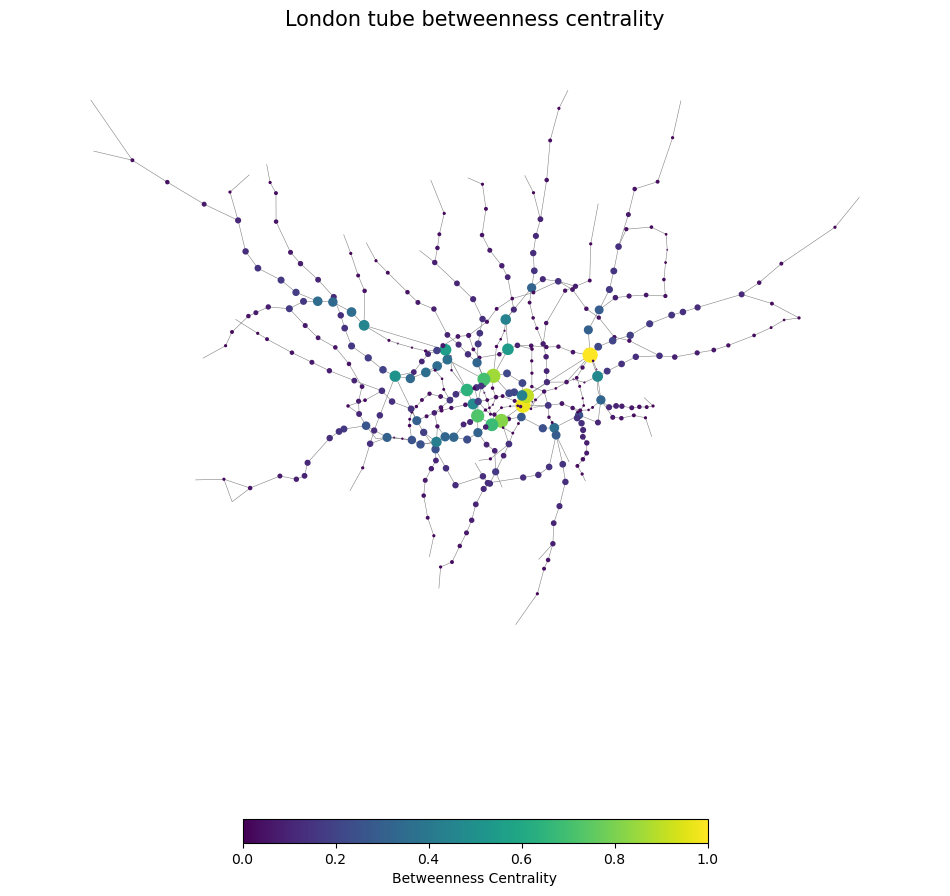

<Figure size 640x480 with 0 Axes>

In [13]:
# Lets set colour and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in G.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()
plt.savefig('./img/')

Betweenness centrality measures the number of shortest paths between all pairs of nodes passing though that vertex. Briefly, it captures how often the node is on a shortest path between 其他任何两点。
... is defined by the equation

Betweenness centrality(未标准化的)的数值极差numerical range很大。

高Betweenness centrality点通常act as 最短路径上的bridges，and it indicates the brokers in the network. In the underground network, 节点value越高，意味着更多的乘客路线会经过该站，这些点可能是不同地铁线路间的重要桥梁，承载了更多的客流量。  
在表中可以看到，除了Stratford, Bank and Monument，King's Cross St. Pancras外, Liverpool Street，Waterloo, Euston等多个换乘站点进入了前十。尽管本网络没有考虑railway，它与我们认知中的underground and railway换乘枢纽站 in London相符合，这也侧面证明了伦敦地铁网络的合理性。


### Closeness Centrality

In [14]:
df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

,degree,degree_n,betweenness,closeness
Green Park,0.0150,6,17223.622114,0.114778
Bank and Monument,0.0200,8,23181.058947,0.113572
King's Cross St. Pancras,0.0175,7,20373.521465,0.113443
Westminster,0.0100,4,16226.155916,0.112549
Waterloo,0.0150,6,19464.882323,0.112265
Oxford Circus,0.0150,6,4296.746032,0.111204
Bond Street,0.0100,4,11298.961255,0.110988
Farringdon,0.0050,2,5116.012518,0.110742
Angel,0.0050,2,5116.012518,0.110742
Moorgate,0.0100,4,10387.458369,0.110314


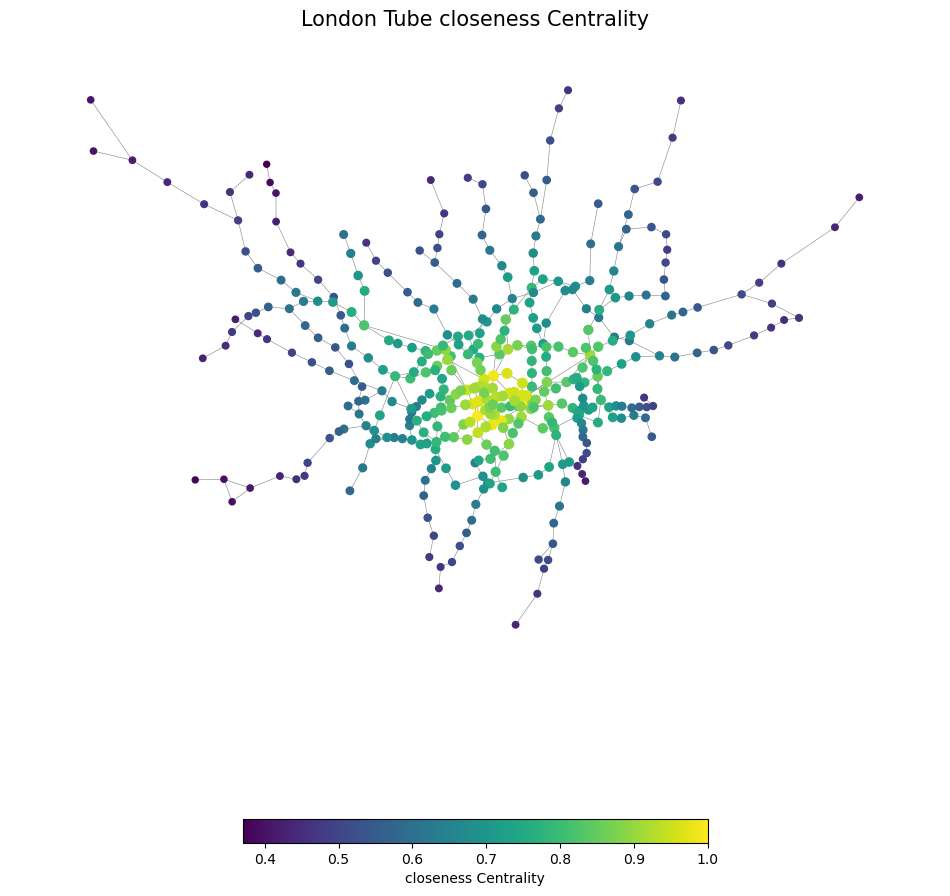

In [15]:
# Lets set colour and size of nodes according to closeness values
closeness_values=[(i[1]['closeness']) for i in G.nodes(data=True)]

bet_color=[(i[1]['closeness']/max(closeness_values)) for i in G.nodes(data=True)]
bet_size=[(i[1]['closeness']/max(closeness_values))*50 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube closeness Centrality",fontsize=15)
plt.show()

Closeness centrality measure该节点到其他节点的shortest path length, 考虑了该节点到其他节点的距离(尽管此处我们使用topological network，因此不考虑实际距离，但仍可以一定程度上代表travel cost)。它表示了点与其他点的紧密程度，相比于Betweenness和degree centrality, 它的全局性更强。
value越高，该点与其他节点的平均距离越近，传递信息的效率更高，在地铁网络中，这意味着该站到其他站点的可达性越高。因此，高closeness centrality的点意味着乘客可以通过这一地铁站更快速地到达其他点。所以这些点是重要的地铁交通枢纽，可能承载更大的客流量？

Closeness centrality的一个缺点是，numerical range很小，相互间差异小，数值重复。

visualize之后，显现出London underground network的Closeness centrality在地理上聚集分布的特点。

## 1.2 Impact measures
Find 2 different measures to evaluate the impact of the node removal on the network. These need to be global measures referring to the whole network and not to specific nodes or links. **Explain whether these two measures are specific to the London underground, or whether they could also be used to evaluate the resilience of any other network.**


_Report 陈述_  
从地铁网络韧性的角度，我们关注节点之间的相互关系，与彼此联系的紧密程度。

当分析weighted network时，如考虑passenger flow和distance时，还需要考虑节点间的交通流量和节点的位置。
one of objectives is to 找出网络的脆弱点和瓶颈。应当优先保护哪些站点，换句话说，应当先攻击哪些站点，如果我们想更快摧毁地铁网络。

* __Average Clustering Coefficient__ 

the first measure is the avearge clustering coefficient to capture how connected and clustered the nodes in the graph.
\begin{equation}
C = \frac{1}{n}\sum_{v \in G} c_v,
\end{equation} 


 <C> is the probability that two neighbors of a randomly selected node link to each other. 

对于节点, it means how close its neighbour nodes are to form a clique/complete graph，measures that 该站是否能提供更多备选travel路线. 

在地铁网络中，higher clustering coefficient意味着该地铁网络内部有更多连接不同站点的小循环，整体运输能力更加robust,更加灵活.相反低值意味着该网络内部各点与邻居站点之间缺少连接，在受到攻击时，更容易性能损失。
（J. Ponton, P. Wei and D. Sun, "Weighted clustering coefficient maximization for air transportation networks," 2013 European Control Conference (ECC), Zurich, Switzerland, 2013, pp. 866-871, doi: 10.23919/ECC.2013.6669250.）

* __global_efficiency__ 

The efficiency of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes.(documentation)
任意两个节点之间的平均最短路径距离的倒数的平均。该指标可以反映网络的全局可达性和距离特性。

It's a measure of how efficiently it exchanges information, which means how efficiently it transports passengers in the tube.(Latora, Vito, and Massimo Marchiori. “Efficient behavior of small-world networks.” Physical Review Letters 87.19 (2001): 198701. <https://doi.org/10.1103/PhysRevLett.87.198701>)
不过注意，在本topological网络中， 最短距离没有考虑站点间的length，
when a network is damaged partly, the change of its global efficiency could reflect its performance loss.

## 1.3 Node removal 20'
Report the results of the 2 strategies in one plot, and critically discuss the following: **which centrality measure reflects better the importance of a station for the functioning of the underground, which strategy is more effective at studying resilience, and which impact measure is better at assessing the damage after node removal.**

Report 陈述  

* Considering the results of clustering coefficiets and global efficiency(Figure 1-3)，I would say that degree centrality reflects the importance of stations better in the functioning of underground. As during the process of removing nodes, network performance degrades more quickly for degree centrality. Also, it can clearly indicate the significant impact of some certain sites,such as Earl's Court
Betweenness centrality also performs good and helps distinguish important stations. However, in Figure 2 (a), the removal of the first six sites did not cause a significant change in the network clustering coefficient, while the coefficient dropped very rapidly after the removal of the sequantial seventh node, Earl's Court, and the ninth node, Euston. This may suggest that BC has a different strategy for measuring the importance of sites, with a sense of thick and thin. However, in general, the reflection of Degree Centrality is more stable.

* sequential strategy is more effective. Firstly, we can see that sequential nodes removal always give stronger effects on the network’s performance. Secondly, when a station is damaged, there may be a substitution effect where other stations can take on some of the functions of the failed station, and the degree-distribution of the network changes so that sequential removal is more realistic. 

According to the result of analysis, global efficiency is better at assessing the damage after node removal. The global efficiency value keeps declining when removing nodes, which is because the shortest path distance increases as the network becomes disconnected. We can imagine that travel distances is increasing, and routes are more tortuous, and the operational efficiency of the underground is decreasing steadily, therefore global efficiency is a direct reflection of the underground 's transport function.

Average clustering coefficient may be more helpful in recognising node interrelationships and node clustering in the London’s underground network. Looking at the graph, we can pick out some of the obscure nodes that may cause the tube network to collapse, such as the 7th node in Figure 1-sequential line (Earl’s court), the 9th node in Figure 2-sequential line (Euston station), the 6th node in Figure 2-sequential line West Hampstead.


In [16]:
clustering_coefficient = nx.average_clustering(G)
r = nx.average_shortest_path_length(G)
global_efficiency = nx.global_efficiency(G)
local_efficiency = nx.local_efficiency(G)

print("average_shortest_path_length: %3.4f" % r)
print("clustering_coefficient: %3.4f" % clustering_coefficient)
print("global_efficiency: %3.4f" % global_efficiency)
print("local_efficiency: %3.4f" % local_efficiency)

average_shortest_path_length: 13.5460
clustering_coefficient: 0.0304
global_efficiency: 0.1013
local_efficiency: 0.0305


In [17]:
print(nx.info(G))
print(nx.density(G))
print(nx.number_connected_components(G))

Graph with 401 nodes and 467 edges
0.005822942643391521
1


C:\Users\JinJiang\AppData\Local\Temp\ipykernel_27388\491757779.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [18]:
# 创建dictionary，储存原始网络的系数
original_network = {'removed_node': ['None'], 'number_of_removed_nodes':[0],'clustering_coefficient': [nx.average_clustering(G)], 'global_efficiency': [nx.global_efficiency(G)]}
print(original_network)

{'removed_node': ['None'], 'number_of_removed_nodes': [0], 'clustering_coefficient': [0.030382377389858686], 'global_efficiency': [0.10125619359721723]}


### Degree Centrality 

* **A) Non-Sequential removal strategy**

In [19]:
# To remove 10 highest values_betweenness:
# List of nodes:
values_sorted = sorted(degr.items(), key=itemgetter(1), reverse=True)
top_10_nodes = [node[0] for node in values_sorted[:10]]
print(top_10_nodes)

['Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", 'West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Liverpool Street', "Earl's Court"]


In [20]:
num_nodes_removed = 0  
results = {'removed_node': [], 'number_of_removed_nodes':[],'clustering_coefficient': [], 'global_efficiency': []}
# 创建原始网络的副本
G_copy = G.copy()

for node in top_10_nodes:
    G_copy.remove_node(node)
    # 计算新的网络的系数，并储存
    # average_shortest_path_length_new_non = nx.average_shortest_path_length(G_copy)
    global_efficiency_new_non = nx.global_efficiency(G_copy)
    clustering_coefficient_new_non = nx.average_clustering(G_copy)
    results['removed_node'].append(node)
    results['number_of_removed_nodes'].append(num_nodes_removed+1 )
    results['clustering_coefficient'].append(clustering_coefficient_new_non)
    results['global_efficiency'].append(global_efficiency_new_non)
    # print移除节点后的结果
    print("Removed Node:", node)
    # print 剩余components的数量
    print("there are %d components left" % (nx.number_connected_components(G_copy)))
    print('-------------------')
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    # print("Clustering Coefficient:" , clustering_coefficient_new_non)
    num_nodes_removed += 1

results_df = pd.DataFrame(results)
# join the orginal network results with the new results
results_df = pd.concat([pd.DataFrame(original_network), results_df], ignore_index=True)
print(results_df)
# 保存结果为csv
results_df.to_csv('impact_degreeC_non.csv', index=False)

Removed Node: Stratford
there are 3 components left
-------------------
Removed Node: Bank and Monument
there are 3 components left
-------------------
Removed Node: Baker Street
there are 3 components left
-------------------
Removed Node: King's Cross St. Pancras
there are 4 components left
-------------------
Removed Node: West Ham
there are 5 components left
-------------------
Removed Node: Canning Town
there are 8 components left
-------------------
Removed Node: Waterloo
there are 8 components left
-------------------
Removed Node: Green Park
there are 8 components left
-------------------
Removed Node: Liverpool Street
there are 9 components left
-------------------
Removed Node: Earl's Court
there are 9 components left
-------------------
                removed_node  number_of_removed_nodes  clustering_coefficient  \
0                       None                        0                0.030382   
1                  Stratford                        1                0.030625   

In [21]:
results_df

,removed_node,number_of_removed_nodes,clustering_coefficient,global_efficiency
0,None,0,0.030382,0.101256
1,Stratford,1,0.030625,0.088917
2,Bank and Monument,2,0.030027,0.085862
3,Baker Street,3,0.027052,0.082033
4,King's Cross St. Pancras,4,0.027288,0.075700
5,West Ham,5,0.024411,0.073022
6,Canning Town,6,0.024473,0.068935
7,Waterloo,7,0.023435,0.067219
8,Green Park,8,0.021968,0.066221
9,Liverpool Street,9,0.022024,0.064602


* Information of the left graph after node removal

In [22]:
print(nx.info(G_copy))

Graph with 391 nodes and 405 edges


C:\Users\JinJiang\AppData\Local\Temp\ipykernel_27388\2929167776.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_copy))


In [23]:
G2 = G_copy.copy()
print(nx.is_connected(G2))
# number of connected components
print("the number of connected components is", nx.number_connected_components(G2))
# To comput the size ( number of node) of each component
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
print("the size of each component is", [len(subgraph.nodes) for subgraph in Subg])

False
the number of connected components is 9
the size of each component is [347, 2, 5, 2, 1, 8, 1, 5, 20]


In [24]:
# To obtain the largest component as a new graph: 
# Get the list of components:
components = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G2.subgraph(largest_component)

* **B) Sequential removal strategy**

In [25]:
sorted_degree_centrality = sorted(degr.items(), key=lambda x: x[1], reverse=True)
top_nodes = [node[0] for node in sorted_degree_centrality]
print(top_nodes[:10])
clustering_coefficient = nx.average_clustering(G)
r = nx.average_shortest_path_length(G)
global_efficiency = nx.global_efficiency(G)

print("average_shortest_path_length: %3.4f" % r)
print("clustering_coefficient: %3.4f" % clustering_coefficient)
print("global_efficiency: %3.4f" % global_efficiency)

['Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", 'West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Liverpool Street', "Earl's Court"]
average_shortest_path_length: 13.5460
clustering_coefficient: 0.0304
global_efficiency: 0.1013


In [26]:
num_nodes_removed = 0
results = {'removed_node': [],'number_of_removed_nodes':[], 'clustering_coefficient': [], 'global_efficiency': [],}

# 创建原始网络的副本
G_copy = G.copy()

while num_nodes_removed < 10 and len(top_nodes) > 0:
    # 计算 degree centrality，排序，取前十个节点
    degree = nx.degree_centrality(G_copy)
    sorted_degree_centrality = sorted(degree.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_degree_centrality]
    # print(top_nodes[:10])
    # 移除第一个节点
    node_to_remove = top_nodes.pop(0)
    G_copy.remove_node(node_to_remove) 
    # 重新计算degree centrality和系数
    degree_centrality_new = nx.degree_centrality(G_copy)
    sorted_degree_centrality_new = sorted(degree_centrality_new.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_degree_centrality_new]
    # average_shortest_path_length_new = nx.average_shortest_path_length(G_copy)
    global_efficiency = nx.global_efficiency(G_copy)
    clustering_coefficient_new = nx.average_clustering(G_copy)
    # 储存结果到dictionary
    results['removed_node'].append(node_to_remove)
    results['clustering_coefficient'].append(clustering_coefficient_new)
    # results['average_shortest_path_length'].append(average_shortest_path_length_new)
    results['global_efficiency'].append(global_efficiency)
    results['number_of_removed_nodes'].append(num_nodes_removed+1)
    # print移除节点后的结果
    # print("New Sorted Degree centrality ranking:", sorted_degree_centrality_new[:10])
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    num_nodes_removed += 1

results_df2 = pd.DataFrame(results)
# join the orginal network results with the new results
results_df2 = pd.concat([pd.DataFrame(original_network), results_df2], ignore_index=True)
print(results_df2)
# 保存结果为csv
results_df2.to_csv('impact_degreeC_seq.csv', index=False)

                removed_node  number_of_removed_nodes  clustering_coefficient  \
0                       None                        0                0.030382   
1                  Stratford                        1                0.030625   
2          Bank and Monument                        2                0.030027   
3               Baker Street                        3                0.027052   
4   King's Cross St. Pancras                        4                0.027288   
5               Canning Town                        5                0.024411   
6                 Green Park                        6                0.023376   
7               Earl's Court                        7                0.016582   
8                   Waterloo                        8                0.015098   
9         Willesden Junction                        9                0.015136   
10             Turnham Green                       10                0.011935   

    global_efficiency  
0  

In [27]:
results_df2

,removed_node,number_of_removed_nodes,clustering_coefficient,global_efficiency
0,None,0,0.030382,0.101256
1,Stratford,1,0.030625,0.088917
2,Bank and Monument,2,0.030027,0.085862
3,Baker Street,3,0.027052,0.082033
4,King's Cross St. Pancras,4,0.027288,0.075700
5,Canning Town,5,0.024411,0.070396
6,Green Park,6,0.023376,0.069402
7,Earl's Court,7,0.016582,0.067772
8,Waterloo,8,0.015098,0.065936
9,Willesden Junction,9,0.015136,0.057790


### 比较两种策略-report plot

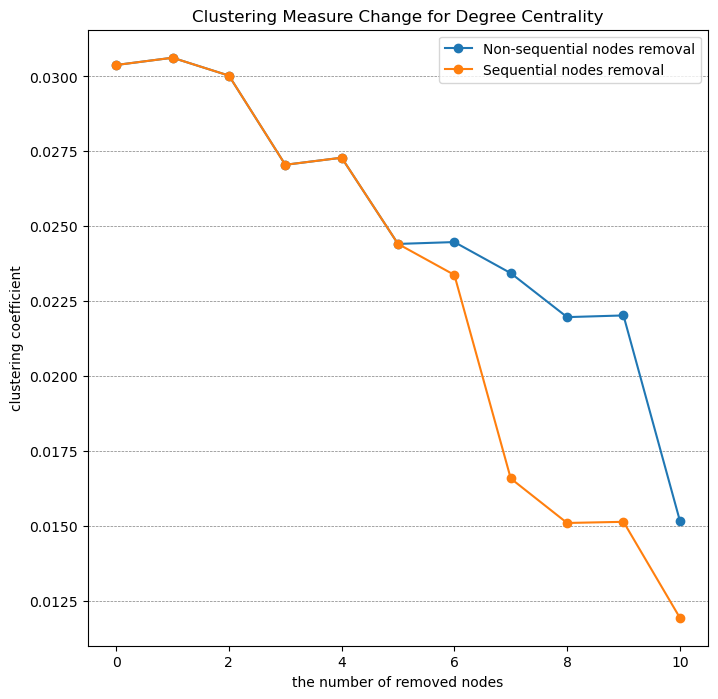

In [28]:
# clustering coefficient
fig, ax = plt.subplots(figsize=(8,8))

results_df.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential nodes removal', marker='o')
results_df2.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient',label='Sequential nodes removal', marker='o')

# # 添加标注
# for index, row in results_df.iterrows():
#     plt.annotate(row['removed_node'], xy=(row['x'], row['y']), xytext=(row['x']+0.1, row['y']+0.1))

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('clustering coefficient')
ax.set_title('Clustering Measure Change for Degree Centrality')

plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/degree_clustering_coeff.png',dpi=300, bbox_inches='tight')
plt.show()

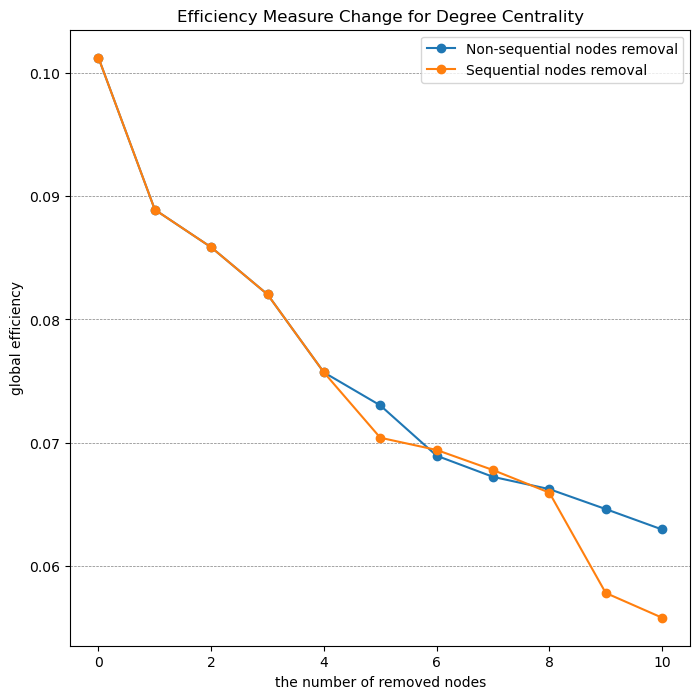

In [29]:
# global efficiency
fig, ax = plt.subplots(figsize=(8,8))

results_df.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential nodes removal', marker='o')
results_df2.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('global efficiency')
ax.set_title('Efficiency Measure Change for Degree Centrality')

# # Add a text box with the additional label text
# textstr = 'removed_node'
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax.text(0.5, -0.1, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/degree_global_efficiency.png',dpi=300, bbox_inches='tight')
plt.show()

#### Names

In [30]:
# 获取一个list of removed nodes
xlabel_name = results_df['removed_node'].tolist()
print(xlabel_name)

['None', 'Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", 'West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Liverpool Street', "Earl's Court"]


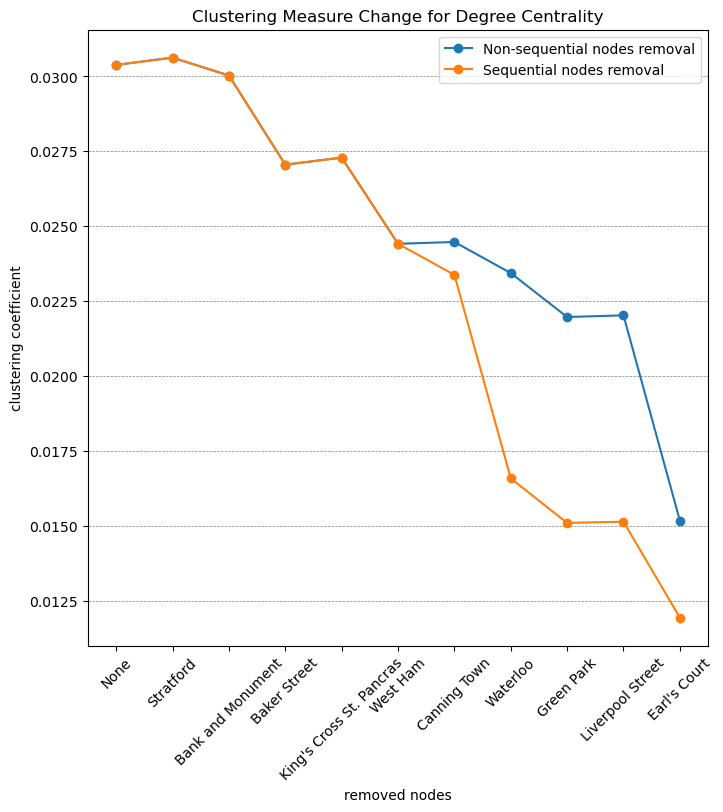

In [31]:
# clustering coefficient
fig, ax = plt.subplots(figsize=(8,8))

results_df.plot(ax=ax,x='removed_node', y='clustering_coefficient', label='Non-sequential nodes removal', marker='o')
results_df2.plot(ax=ax,x='removed_node', y='clustering_coefficient',label='Sequential nodes removal', marker='o')

# # 添加标注
# for index, row in results_df.iterrows():
#     plt.annotate(row['removed_node'], xy=(row['x'], row['y']), xytext=(row['x']+0.1, row['y']+0.1))

ax.legend(loc='best')
ax.set_xlabel('removed nodes')
ax.set_ylabel('clustering coefficient')
ax.set_title('Clustering Measure Change for Degree Centrality')


# Set the x-tick labels
plt.xticks(results_df['number_of_removed_nodes'], xlabel_name)
# 设置X轴标签旋转角度和对齐方式
plt.tick_params(axis='x', labelrotation=45, labelright=True)
plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
# plt.savefig('./img/degree_clustering_coeff.png',dpi=300, bbox_inches='tight')
plt.show()

### __Betweenness Centrality__ 

* **A) Non-Sequential removal strategy**

In [32]:
# To remove 10 highest values_betweenness:
# List of nodes:
values_sorted = sorted(betwn.items(), key=itemgetter(1), reverse=True)
top_10_nodes = [node[0] for node in values_sorted[:10]]
print(top_10_nodes)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston', 'Westminster', 'Baker Street', 'Finchley Road']


In [33]:
num_nodes_removed = 0
results = {'removed_node': [], 'number_of_removed_nodes':[],'clustering_coefficient': [], 'global_efficiency': []}
# 创建原始网络的副本
G_copy = G.copy()

for node in top_10_nodes:
    G_copy.remove_node(node)
    # 计算新的网络的系数，并储存
    global_efficiency_new_non = nx.global_efficiency(G_copy)
    clustering_coefficient_new_non = nx.average_clustering(G_copy)
    results['removed_node'].append(node)
    results['number_of_removed_nodes'].append(num_nodes_removed+1 )
    results['clustering_coefficient'].append(clustering_coefficient_new_non)
    results['global_efficiency'].append(global_efficiency_new_non)
    # print移除节点后的结果
    # print("Removed Node:", node)
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    num_nodes_removed += 1

results_df3 = pd.DataFrame(results)
# join the orginal network results with the new results
results_df3 = pd.concat([pd.DataFrame(original_network), results_df3], ignore_index=True)
# 保存结果为csv
results_df3.to_csv('impact_betwnC_non.csv', index=False)

In [34]:
results_df3

,removed_node,number_of_removed_nodes,clustering_coefficient,global_efficiency
0,None,0,0.030382,0.101256
1,Stratford,1,0.030625,0.088917
2,Bank and Monument,2,0.030027,0.085862
3,Liverpool Street,3,0.030103,0.084963
4,King's Cross St. Pancras,4,0.030347,0.078498
5,Waterloo,5,0.029329,0.075942
6,Green Park,6,0.028306,0.074152
7,Euston,7,0.024994,0.068206
8,Westminster,8,0.025058,0.067660
9,Baker Street,9,0.021599,0.064700


In [35]:
print(nx.info(G_copy))

Graph with 391 nodes and 412 edges


C:\Users\JinJiang\AppData\Local\Temp\ipykernel_27388\2929167776.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_copy))


* **B) Sequential removal strategy**

In [36]:
clustering_coefficient = nx.average_clustering(G)

In [37]:
num_nodes_removed = 0
results = {'removed_node': [],'number_of_removed_nodes':[],'clustering_coefficient': [], 'global_efficiency': [],}
print('the orginal degree assortativity is: ', r)
print("Clustering coefficient:", clustering_coefficient)

# 创建原始网络的副本
G_copy = G.copy()

while num_nodes_removed < 10 and len(top_nodes) > 0:
    # 计算 betweenness centrality，排序，取前十个节点
    degree = nx.betweenness_centrality(G_copy,normalized=False)
    sorted_degree_centrality = sorted(degree.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_degree_centrality]
    print(top_nodes[:10])
    # 移除第一个节点
    node_to_remove = top_nodes.pop(0)
    G_copy.remove_node(node_to_remove) 
    # 重新计算degree centrality和系数
    centrality_new = nx.betweenness_centrality(G_copy,normalized=False)
    sorted_centrality_new = sorted(centrality_new.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_centrality_new]
    global_efficiency_new = nx.global_efficiency(G_copy)
    r = nx.global_efficiency(G_copy)
    clustering_coefficient_new = nx.average_clustering(G_copy)
    # 储存结果到dictionary
    results['removed_node'].append(node_to_remove)
    results['clustering_coefficient'].append(clustering_coefficient_new)
    results['global_efficiency'].append(r)
    results['number_of_removed_nodes'].append(num_nodes_removed+1)
    # print移除节点后的结果
    # print("New Sorted Degree centrality ranking:", sorted_degree_centrality_new[:10])
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    num_nodes_removed += 1

results_df4 = pd.DataFrame(results)
# join the orginal network results with the new results
results_df4 = pd.concat([pd.DataFrame(original_network), results_df4], ignore_index=True)
print(results_df4)
# 保存结果为csv
results_df4.to_csv('impact_betwnC_seq.csv', index=False)

the orginal degree assortativity is:  13.545997506234414
Clustering coefficient: 0.030382377389858686
['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston', 'Westminster', 'Baker Street', 'Finchley Road']
["King's Cross St. Pancras", 'Bank and Monument', 'Euston', 'Highbury & Islington', 'Baker Street', 'Waterloo', 'Green Park', 'Finsbury Park', 'Finchley Road', 'Canada Water']
['Waterloo', 'Bank and Monument', 'Green Park', 'Westminster', 'Finchley Road', 'Baker Street', 'West Hampstead', 'Canada Water', 'Willesden Junction', 'Bond Street']
['Bank and Monument', 'Finchley Road', 'Canada Water', 'Oxford Circus', 'West Hampstead', 'Baker Street', 'Holborn', 'Tottenham Court Road', 'Chancery Lane', "St. Paul's"]
['Canada Water', 'West Hampstead', 'Finchley Road', 'Gospel Oak', 'Finchley Road & Frognal', 'Hampstead Heath', 'Baker Street', 'Canary Wharf', 'Willesden Junction', 'Surrey Quays']
['West Hampstead', 'Finchley Road 

In [38]:
results_df4

,removed_node,number_of_removed_nodes,clustering_coefficient,global_efficiency
0,None,0,0.030382,0.101256
1,Stratford,1,0.030625,0.088917
2,King's Cross St. Pancras,2,0.030869,0.084603
3,Waterloo,3,0.029971,0.081829
4,Bank and Monument,4,0.029255,0.077678
5,Canada Water,5,0.029329,0.072832
6,West Hampstead,6,0.029403,0.053210
7,Earl's Court,7,0.022625,0.051656
8,Shepherd's Bush,8,0.022683,0.045844
9,Euston,9,0.019339,0.041631


### 比较两种策略-report plot

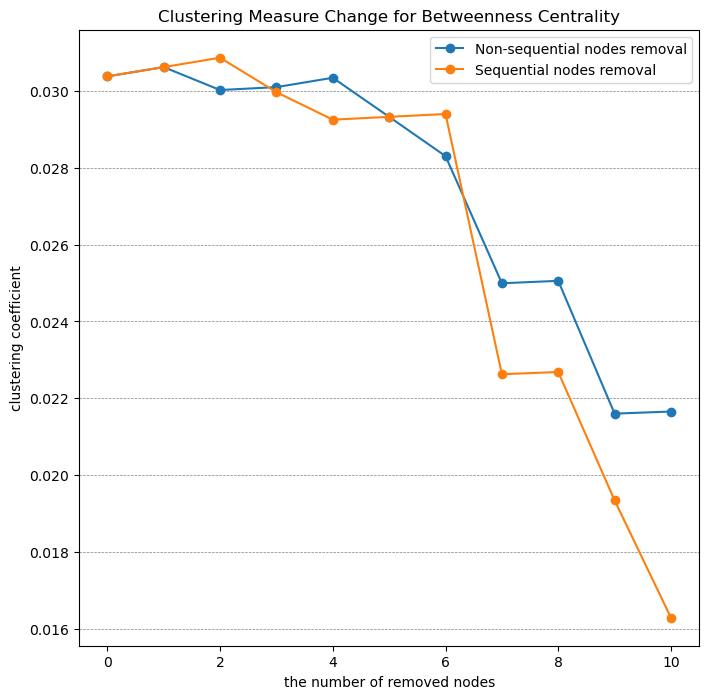

In [39]:
# clustering coefficient
fig, ax = plt.subplots(figsize=(8,8))

results_df3.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential nodes removal', marker='o')
results_df4.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('clustering coefficient')
ax.set_title('Clustering Measure Change for Betweenness Centrality')

plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/betweenness_clustering_coeff.png',dpi=300, bbox_inches='tight')
plt.show()

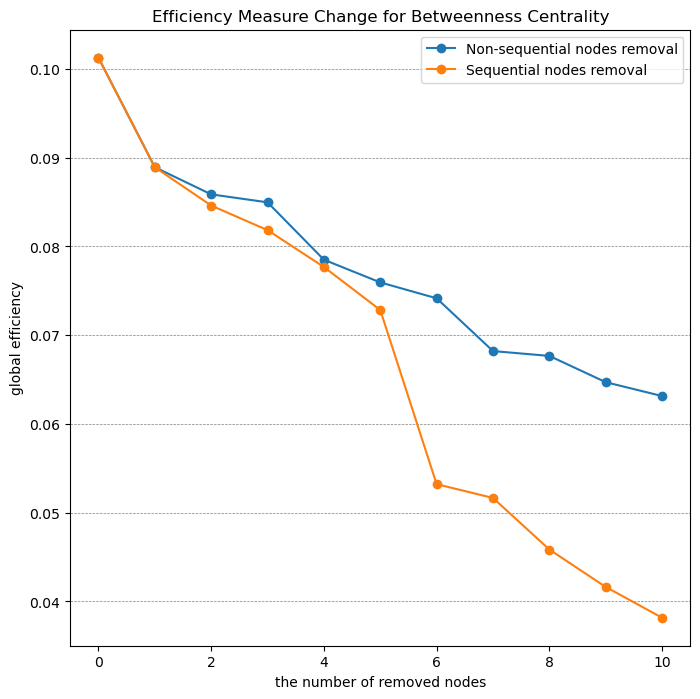

In [40]:
# global efficiency
fig, ax = plt.subplots(figsize=(8,8))

results_df3.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential nodes removal', marker='o')
results_df4.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('global efficiency')
ax.set_title('Efficiency Measure Change for Betweenness Centrality')


plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/betweenness_global_efficiency.png',dpi=300, bbox_inches='tight')
plt.show()

In [41]:
G2 = G_copy.copy()

In [42]:
print(nx.is_connected(G2))
# number of connected components
print("the number of connected components is", nx.number_connected_components(G2))
# To comput the size ( number of node) of each component
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
print("the size of each component is", [len(subgraph.nodes) for subgraph in Subg])

False
the number of connected components is 7
the size of each component is [170, 147, 2, 29, 1, 20, 22]


这个分成了俩大块儿components，比较特别

In [43]:
# To obtain the largest component as a new graph: 
# Get the list of components:
components = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G2.subgraph(largest_component)

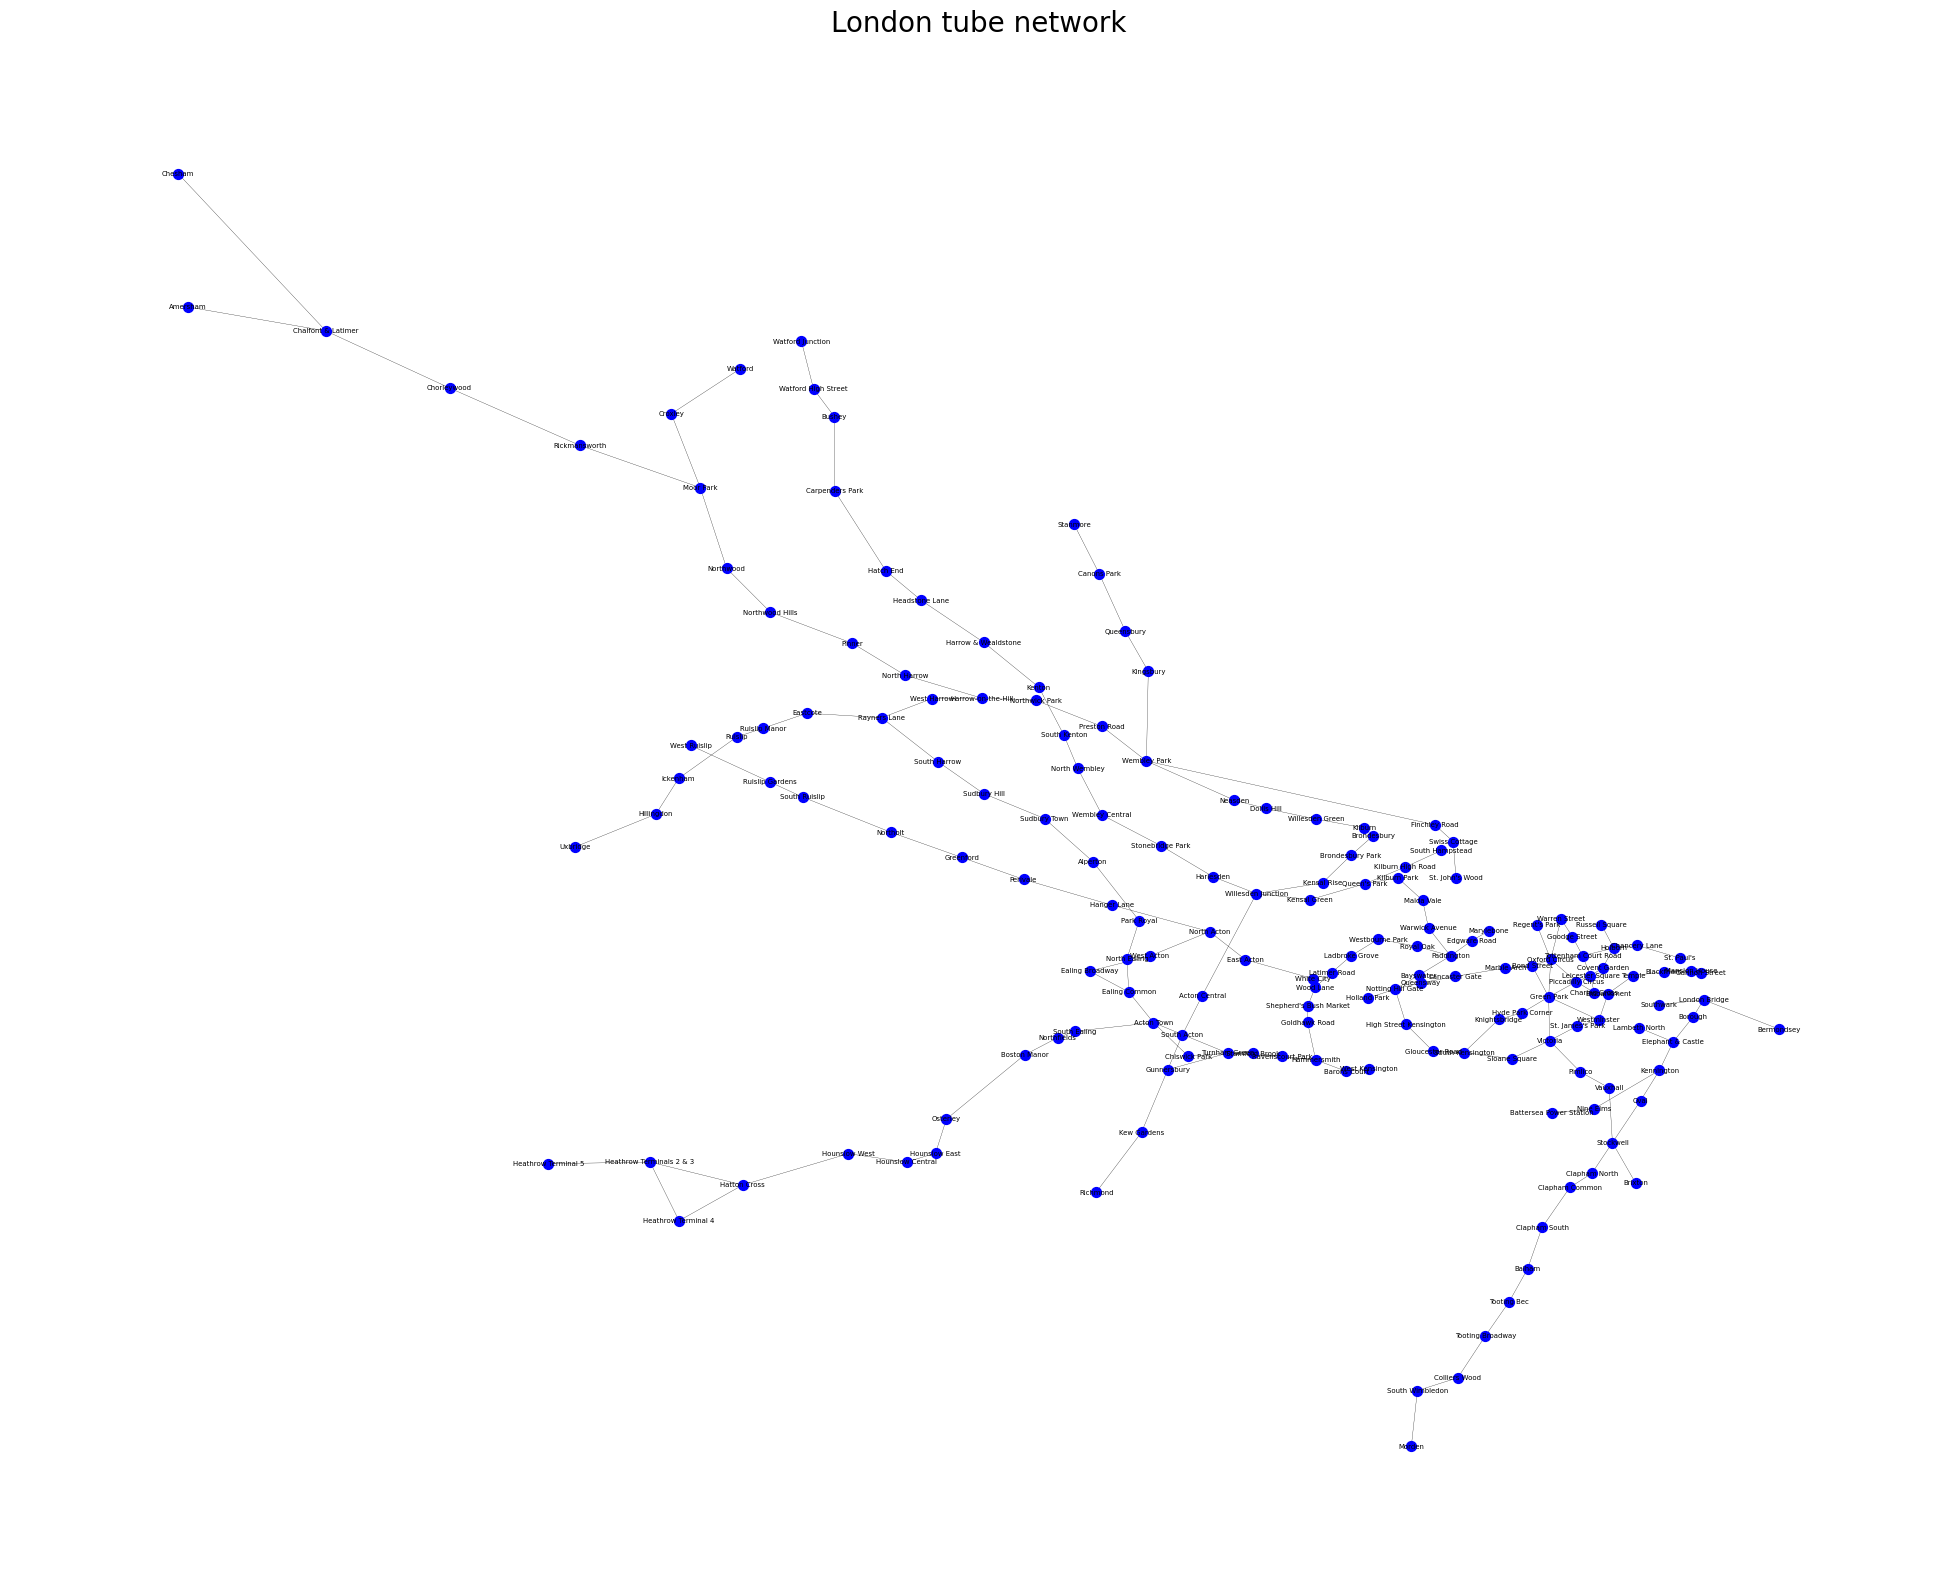

In [44]:
# Let's plot the tube network! 
G2 = Largest_subgraph.copy()
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = {node:node for node in G2.nodes()}

pos = nx.get_node_attributes(G2, 'coords')

nx.draw_networkx_nodes(G2,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G2,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G2,pos, node_labels, font_size=5, font_color='black')

plt.title("London tube network",fontsize=20)
plt.axis("off")
plt.show()


### **Closeness Centrality** 

* **A) Non-Sequential removal strategy**

In [45]:
# To remove 10 highest values of closeness:
# List of nodes:
values_sorted = sorted(clsn.items(), key=itemgetter(1), reverse=True)
top_10_nodes = [node[0] for node in values_sorted[:10]]
print(top_10_nodes)

['Green Park', 'Bank and Monument', "King's Cross St. Pancras", 'Westminster', 'Waterloo', 'Oxford Circus', 'Bond Street', 'Farringdon', 'Angel', 'Moorgate']


In [46]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


C:\Users\JinJiang\AppData\Local\Temp\ipykernel_27388\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [47]:
num_nodes_removed = 0
results = {'removed_node': [], 'number_of_removed_nodes':[],'clustering_coefficient': [], 'global_efficiency': []}
# 创建原始网络的副本
G_copy = G.copy()

for node in top_10_nodes:
    G_copy.remove_node(node)
    # 计算新的网络的系数，并储存
    global_efficiency_new_non = nx.global_efficiency(G_copy)
    clustering_coefficient_new_non = nx.average_clustering(G_copy)
    results['removed_node'].append(node)
    results['number_of_removed_nodes'].append(num_nodes_removed+1 )
    results['clustering_coefficient'].append(clustering_coefficient_new_non)
    results['global_efficiency'].append(global_efficiency_new_non)
    # print移除节点后的结果
    # print("Removed Node:", node)
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    print("there are %d components left" % (nx.number_connected_components(G_copy)))
    print('-------------------')
    num_nodes_removed += 1

results_df5 = pd.DataFrame(results)
# join the orginal network results with the new results
results_df5 = pd.concat([pd.DataFrame(original_network), results_df5], ignore_index=True)
# 保存结果为csv
results_df5.to_csv('impact_closnC_non.csv', index=False)

there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 1 components left
-------------------
there are 3 components left
-------------------


In [48]:
results_df5

,removed_node,number_of_removed_nodes,clustering_coefficient,global_efficiency
0,None,0,0.030382,0.101256
1,Green Park,1,0.029792,0.099190
2,Bank and Monument,2,0.029276,0.094872
3,King's Cross St. Pancras,3,0.029517,0.087934
4,Westminster,4,0.028080,0.087372
5,Waterloo,5,0.028151,0.084859
6,Oxford Circus,6,0.029910,0.082781
7,Bond Street,7,0.030034,0.082581
8,Farringdon,8,0.030110,0.082600
9,Angel,9,0.030187,0.082622


* **B) Sequential removal strategy**

In [49]:
clustering_coefficient = nx.average_clustering(G)
r = nx.global_efficiency(G)
print("Original global_efficiency: %3.4f" % r)
print("Original Clustering Coefficient: %3.4f" % clustering_coefficient)

Original global_efficiency: 0.1013
Original Clustering Coefficient: 0.0304


In [50]:
num_nodes_removed = 0
results = {'removed_node': [],'number_of_removed_nodes':[], 'clustering_coefficient': [], 'global_efficiency': [],}
print('the orginal degree assortativity is: ', r)
print("Clustering coefficient:", clustering_coefficient)

# 创建原始网络的副本
G_copy = G.copy()

while num_nodes_removed < 10 and len(top_nodes) > 0:
    # 计算 closeness centrality，排序，取前十个节点
    degree = nx.closeness_centrality(G_copy)
    sorted_centrality = sorted(degree.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_centrality]
    # print(top_nodes[:10])
    # 移除第一个节点
    node_to_remove = top_nodes.pop(0)
    G_copy.remove_node(node_to_remove) 
    # 重新计算closeness centrality和系数
    centrality_new = nx.closeness_centrality(G_copy)
    sorted_centrality_new = sorted(centrality_new.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_centrality_new]
    global_efficiency_new = nx.global_efficiency(G_copy)
    r = nx.global_efficiency(G_copy)
    clustering_coefficient_new = nx.average_clustering(G_copy)
    # 储存结果到dictionary
    results['removed_node'].append(node_to_remove)
    results['clustering_coefficient'].append(clustering_coefficient_new)
    results['global_efficiency'].append(r)
    results['number_of_removed_nodes'].append(num_nodes_removed+1)
    # print移除节点后的结果
    # print("New Sorted Degree centrality ranking:", sorted_degree_centrality_new[:10])
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    num_nodes_removed += 1

results_df6 = pd.DataFrame(results)
# join the orginal network results with the new results
results_df6 = pd.concat([pd.DataFrame(original_network), results_df6], ignore_index=True)
print(results_df6)
# 保存结果为csv
results_df6.to_csv('impact_closnC_seq.csv', index=False)

the orginal degree assortativity is:  0.10125619359721723
Clustering coefficient: 0.030382377389858686
                removed_node  number_of_removed_nodes  clustering_coefficient  \
0                       None                        0                0.030382   
1                 Green Park                        1                0.029792   
2   King's Cross St. Pancras                        2                0.030033   
3                   Waterloo                        3                0.028715   
4          Bank and Monument                        4                0.028080   
5             West Hampstead                        5                0.028151   
6               Canada Water                        6                0.028222   
7                  Stratford                        7                0.028378   
8               Earl's Court                        8                0.021580   
9            Shepherd's Bush                        9                0.021635   
10    

In [51]:
results_df6

,removed_node,number_of_removed_nodes,clustering_coefficient,global_efficiency
0,None,0,0.030382,0.101256
1,Green Park,1,0.029792,0.099190
2,King's Cross St. Pancras,2,0.030033,0.094435
3,Waterloo,3,0.028715,0.091816
4,Bank and Monument,4,0.028080,0.085426
5,West Hampstead,5,0.028151,0.080544
6,Canada Water,6,0.028222,0.058101
7,Stratford,7,0.028378,0.051884
8,Earl's Court,8,0.021580,0.050350
9,Shepherd's Bush,9,0.021635,0.044395


### 比较两种策略-report plot

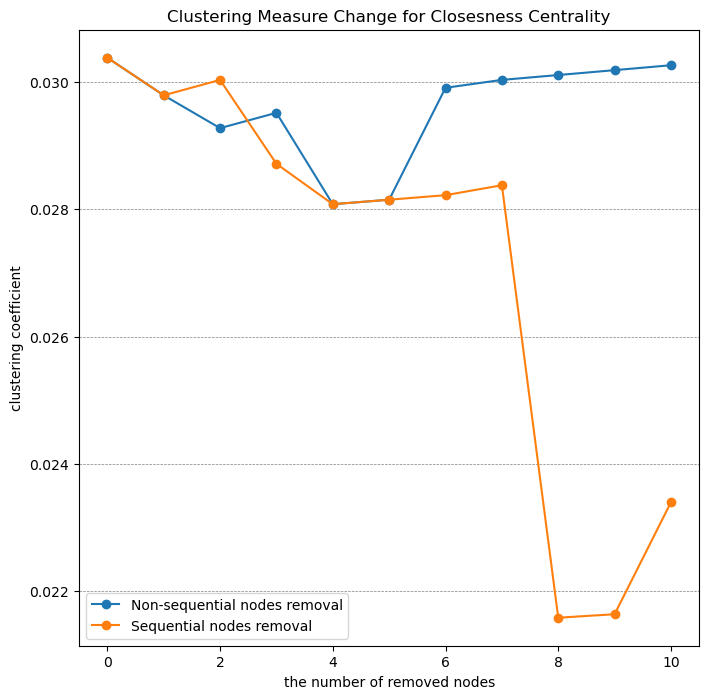

In [52]:
# clustering coefficient
fig, ax = plt.subplots(figsize=(8,8))

results_df5.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential nodes removal', marker='o')
results_df6.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('clustering coefficient')
ax.set_title('Clustering Measure Change for Closesness Centrality')

plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/closesness_clustering_coeff.png',dpi=300, bbox_inches='tight')
plt.show()

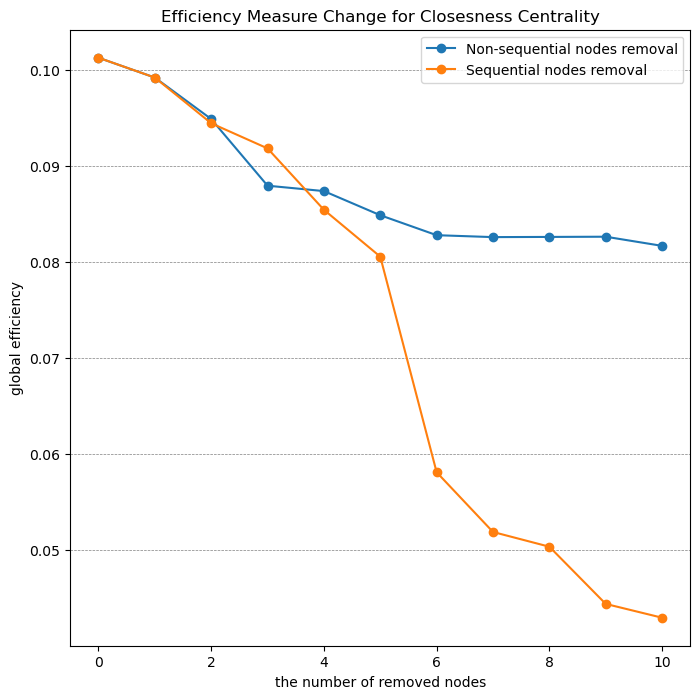

In [53]:
# global efficiency
fig, ax = plt.subplots(figsize=(8,8))

results_df5.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential nodes removal', marker='o')
results_df6.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('global efficiency')
ax.set_title('Efficiency Measure Change for Closesness Centrality')


plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/closesness_global_efficiency.png',dpi=300, bbox_inches='tight')
plt.show()

### Plot All

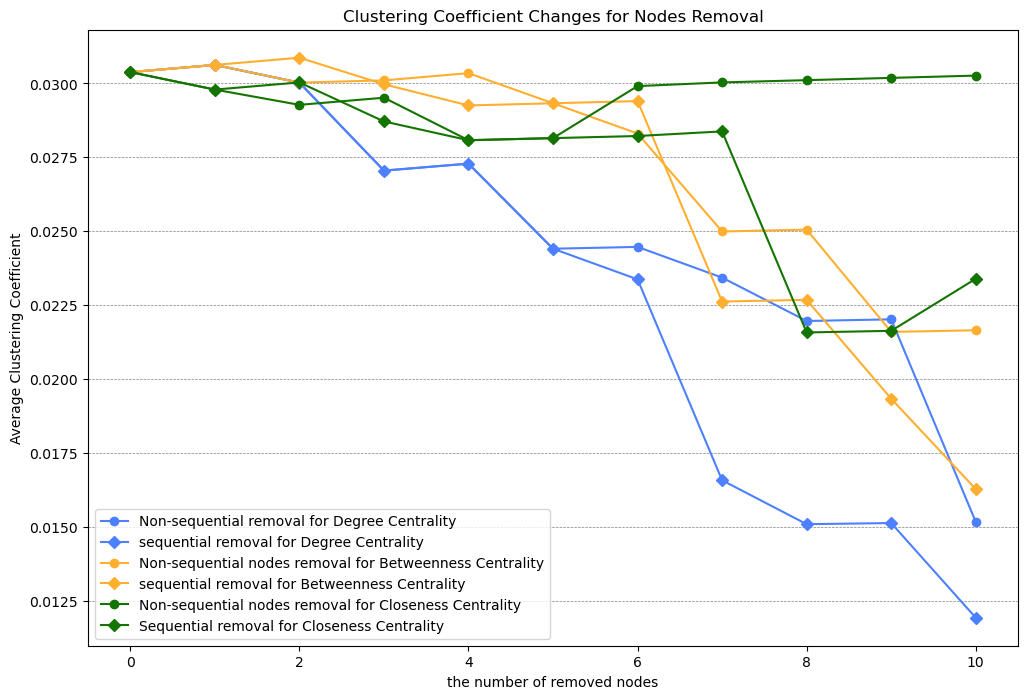

In [54]:
# clustering_coefficient
fig, ax = plt.subplots(figsize=(12,8))

results_df.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential removal for Degree Centrality', marker='o',color='#4d80ff')
results_df2.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='sequential removal for Degree Centrality', marker='D',color='#4d80ff')
results_df3.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential nodes removal for Betweenness Centrality', marker='o',color='#ffaf2f')
results_df4.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='sequential removal for Betweenness Centrality', marker='D',color='#ffaf2f')
results_df5.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential nodes removal for Closeness Centrality', marker='o',color='#147400')
results_df6.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient',label='Sequential removal for Closeness Centrality', marker='D',color='#147400')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('Average Clustering Coefficient')
ax.set_title('Clustering Coefficient Changes for Nodes Removal')

plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/clustering_coefficient_all.png',dpi=300, bbox_inches='tight')
plt.show()

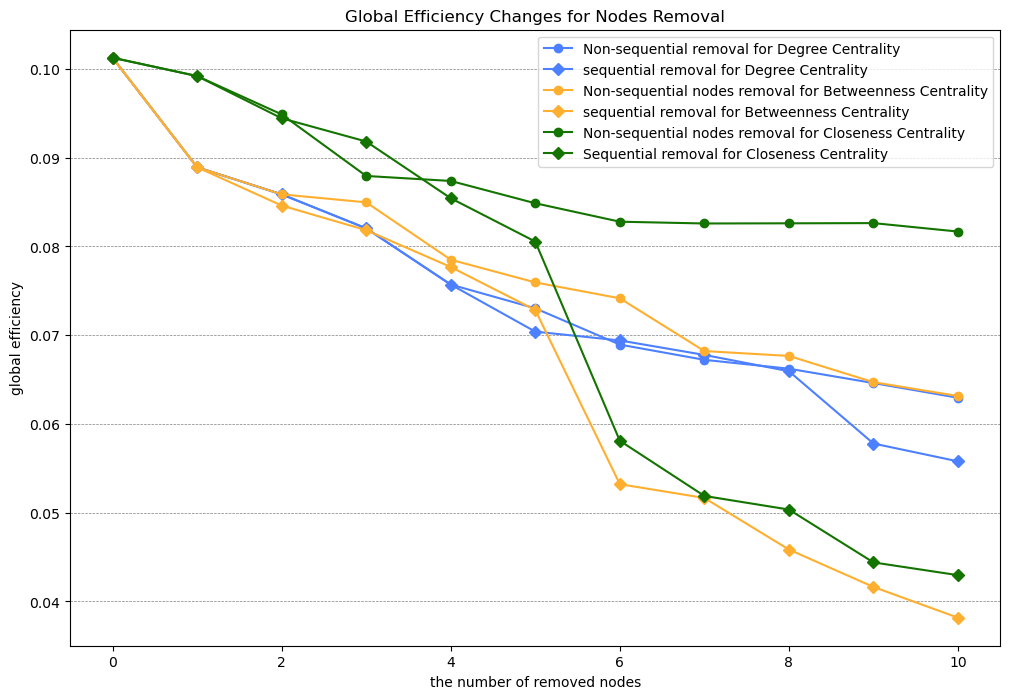

In [55]:
# global_efficiency
fig, ax = plt.subplots(figsize=(12,8))

results_df.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential removal for Degree Centrality', marker='o',color='#4d80ff')
results_df2.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='sequential removal for Degree Centrality', marker='D',color='#4d80ff')
results_df3.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential nodes removal for Betweenness Centrality', marker='o',color='#ffaf2f')
results_df4.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='sequential removal for Betweenness Centrality', marker='D',color='#ffaf2f')
results_df5.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential nodes removal for Closeness Centrality', marker='o',color='#147400')
results_df6.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency',label='Sequential removal for Closeness Centrality', marker='D',color='#147400')

ax.legend(loc='best')
ax.set_xlabel('the number of removed nodes')
ax.set_ylabel('global efficiency')
ax.set_title('Global Efficiency Changes for Nodes Removal')

plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/global_efficiency_all.png',dpi=300, bbox_inches='tight')
plt.show()

### other

In [56]:
G2 = G_copy.copy()

In [57]:
print(nx.is_connected(G2))
# number of connected components
print("the number of connected components is", nx.number_connected_components(G2))
# To comput the size ( number of node) of each component
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
print("the size of each component is", [len(subgraph.nodes) for subgraph in Subg])

False
the number of connected components is 5
the size of each component is [194, 147, 29, 1, 20]


这也分成了两大块Components

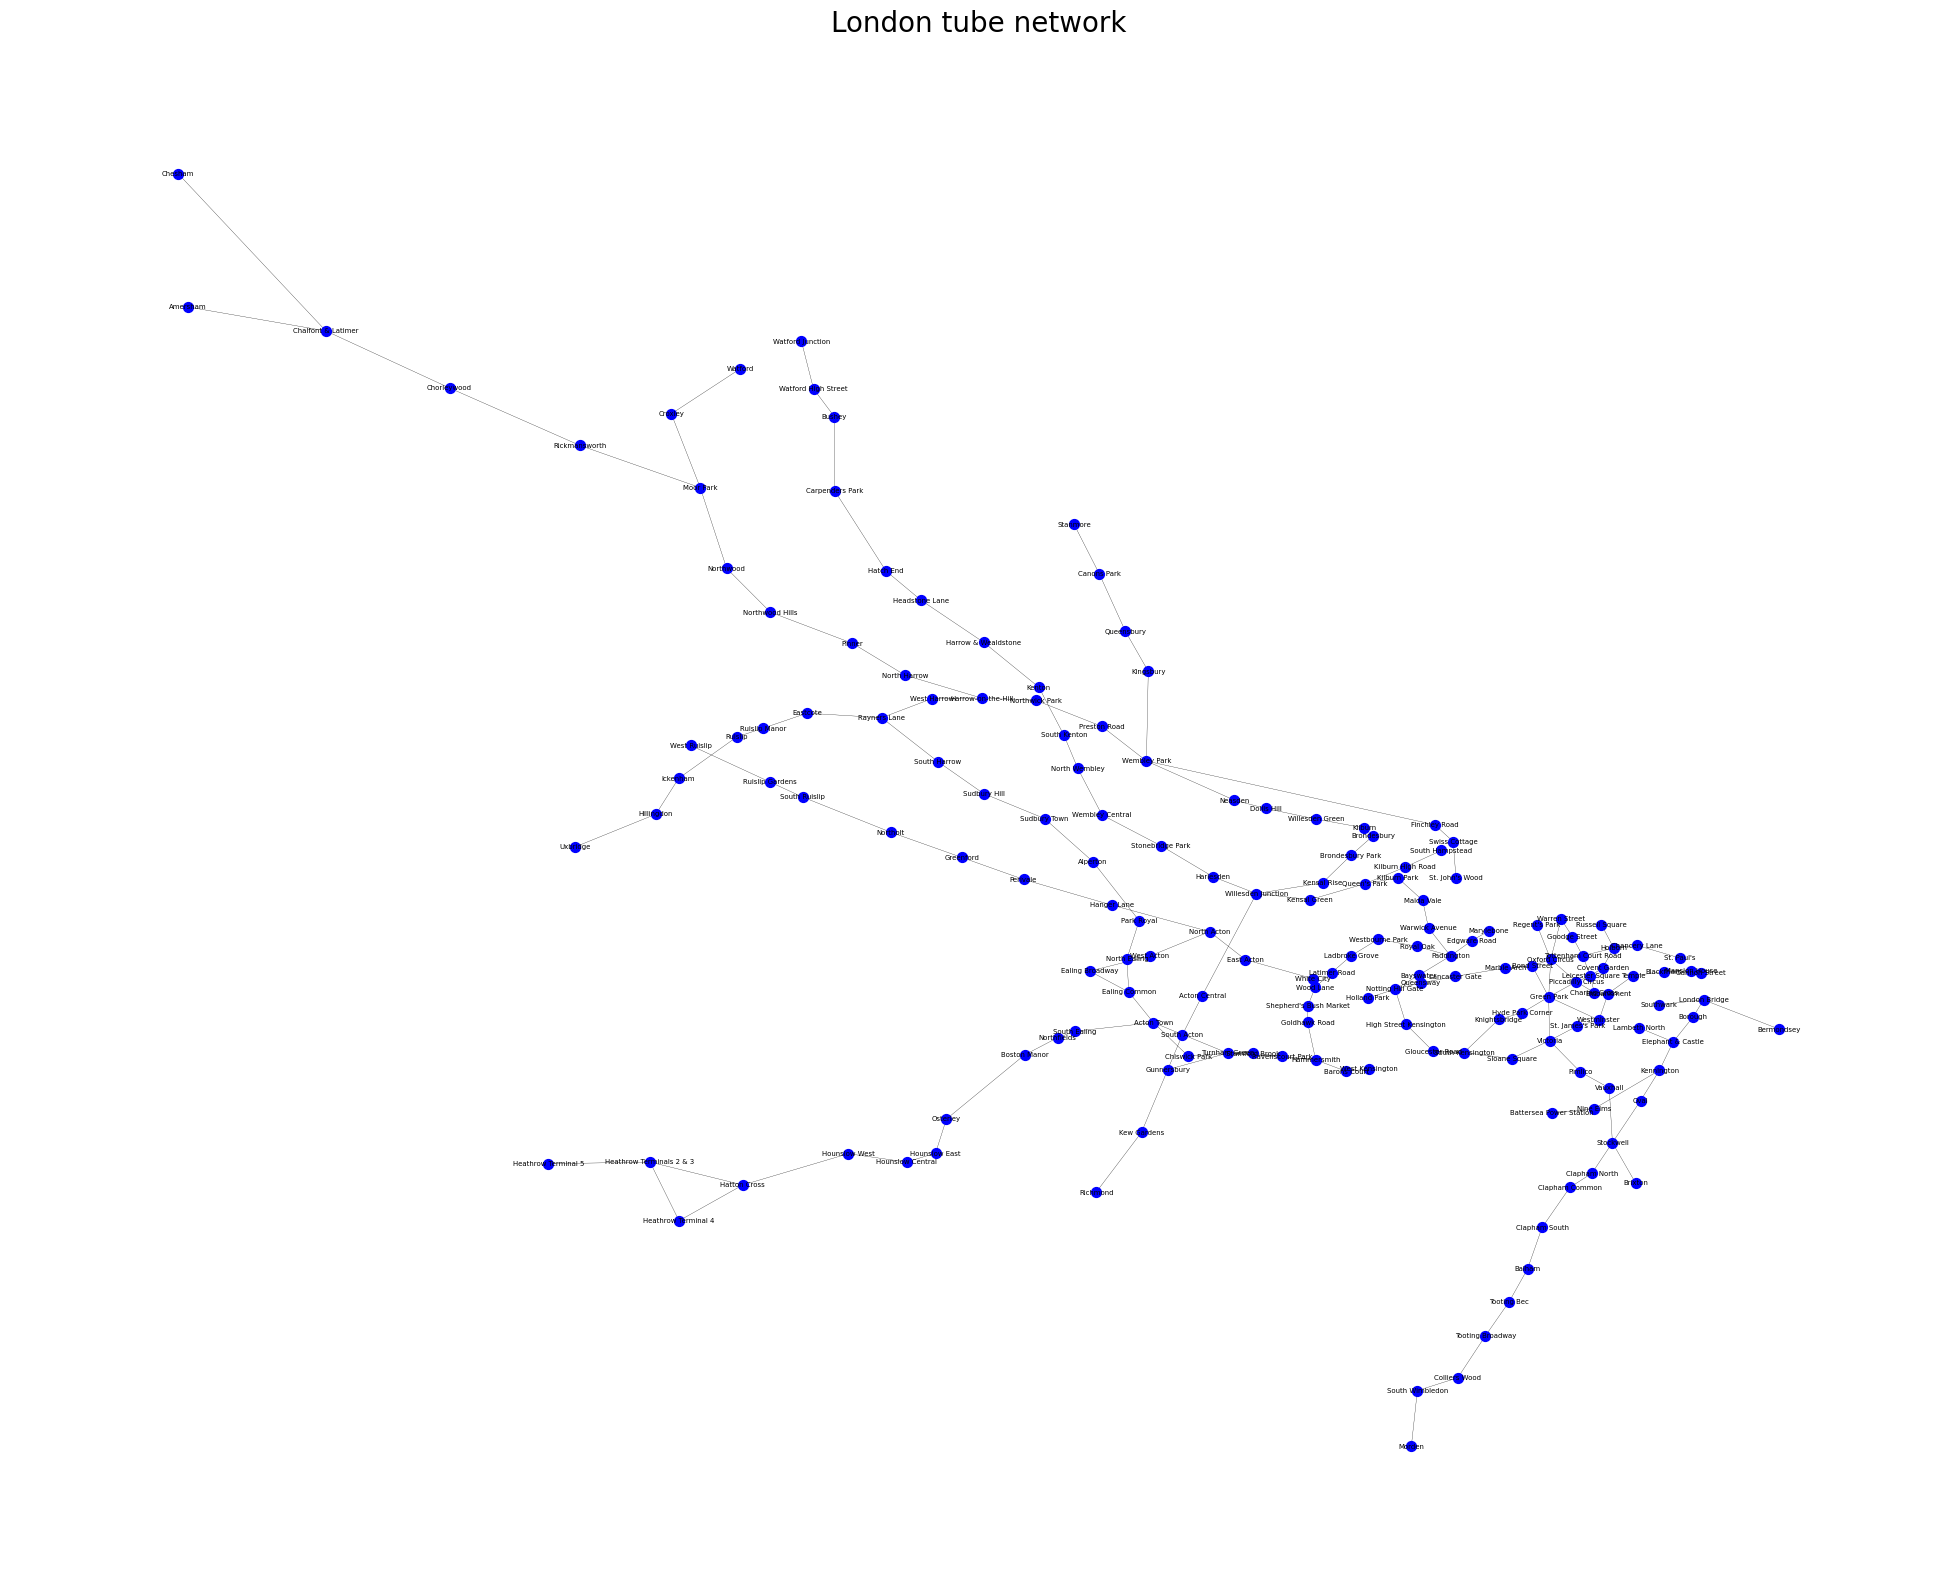

In [58]:
# Let's plot the tube network! 
G2 = Largest_subgraph.copy()
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = {node:node for node in G2.nodes()}

pos = nx.get_node_attributes(G2, 'coords')

nx.draw_networkx_nodes(G2,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G2,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G2,pos, node_labels, font_size=5, font_color='black')

plt.title("London tube network",fontsize=20)
plt.axis("off")
plt.show()


# 2. Weighted Network

## 2.1 Adjust the centrality measure and recompute the nodes ranking  (3')
在topological network中，通过逐步移除站点并观察网络性能的变化，综合2个measure在三种centrality下的变化，可以发现xx站点 are indicated as the most relevant stations.  

betweenness 和 degree centrality都能较好得衡量最影响网络性能的站点，考虑到betweenness centrality考虑了shortest path的数量，，以及其可调整性，这里选择betweenness centrality进行进一步调整。First, 增加flow作为权重，不仅考虑最短路径经过该点的数量，而且考虑该路径承载的客流量。因此flow越大的最短路径会contribute more to 该点的centrality value. Secondly,..

### 调整Betweenness centrality的权重

#### 看看flows的数值分布

In [59]:
flows = {'edge':[], 'flows':[]}
# now I want to get all the length value from the edges, and store them in a dictionary
for edge in G.edges():
    flows['edge'].append(edge)
    flows['flows'].append(G.edges[edge]['flows'])

# create a dataframe from the dictionary
flows_df = pd.DataFrame(flows)
flows_df.tail()

,edge,flows
462,"(Hounslow West, Hounslow Central)",11234
463,"(Hounslow Central, Hounslow East)",13469
464,"(Hounslow East, Osterley)",15935
465,"(Osterley, Boston Manor)",17445
466,"(Boston Manor, Northfields)",18598


In [60]:
flows_sorted = flows_df.sort_values(["flows"], ascending=False)
flows_sorted.tail()
# 发现有三个边的流量为0，所以我们可以把这三个边去掉

,edge,flows
458,"(Heathrow Terminal 4, Heathrow Terminals 2 & 3)",310
144,"(Theobalds Grove, Cheshunt)",287
440,"(Battersea Power Station, Nine Elms)",0
420,"(Kennington, Nine Elms)",0
215,"(Wandsworth Road, Battersea Park)",0


<AxesSubplot:xlabel='edge'>

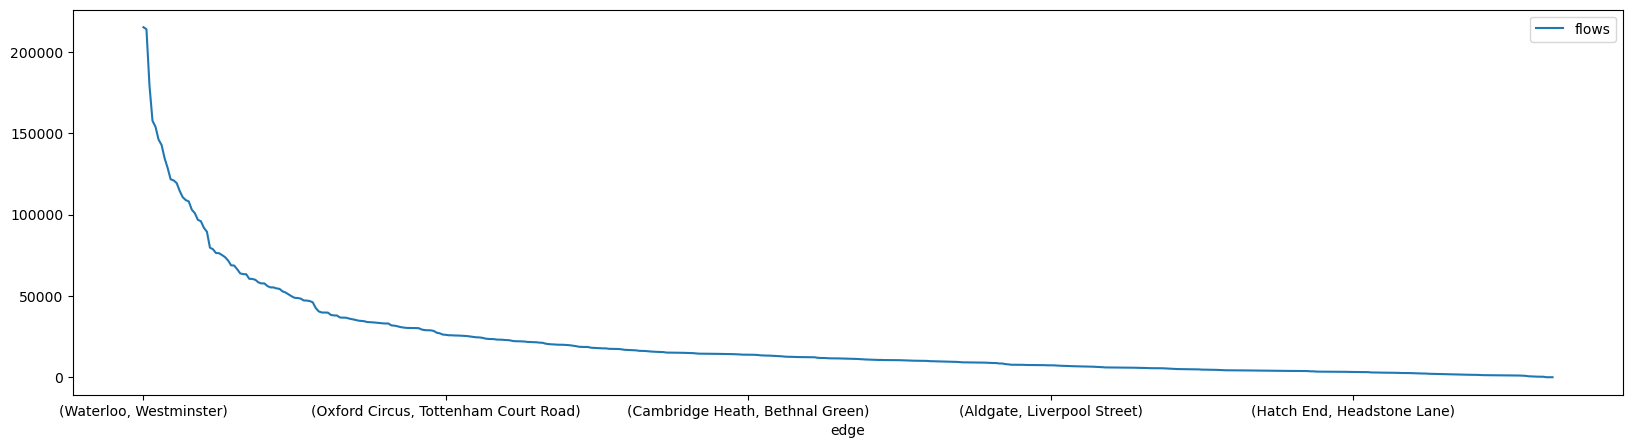

In [61]:
# plot flows dataframe to see the distribution of flows
flows_sorted.plot(x='edge', y='flows', figsize=(20,5))

#### Flows Transformation

The higher the flow between two stations, the more important they are, so the smaller the weight 'distance' should be.
Another point is that the numerical range of the flow is quite large. 

Plot flow的分布，发现，要转换。

Therfore I firstly normalized the original flow, and then use the value of '1 minus normalized flow' as the weights of edges.

Degree C只考虑了连接节点的数量，因此weighted graph对DC没有影响，不需要调整。

对于Betweenness, Weights are used to calculate weighted shortest paths, so they are interpreted as distances. 所以距离/权重越小，值越大。
对于closeness centrality是一样的情况，d与数值成反比。所以shorest path越短，closeness越大。所以需要反转flow与最终使用的weight的关系。


In [62]:
# （不不不）During processing, 三个flow值为零的边被删除。
# # get a list of edges with flows = 0
# edges_to_remove = flows_sorted[flows_sorted['flows'] == 0]['edge'].tolist()
# print(edges_to_remove)

# # remove the edges with flows = 0 in the graph
# # copy the graph
# # G_w = G.copy()
# G.remove_edges_from(edges_to_remove)


In [63]:
# # Inverse weights:
# inv_flows={(e1, e2):round(1./flows,7) for e1, e2, flows in G.edges(data='flows')}
# # JIN: the 1./weight is used to inverse the weight
# # JIN: the round() function is used to round off the values to 7 decimal places

# # Let us add the inversed weight as an attribute to the edges in the graph
# nx.set_edge_attributes(G, inv_flows, 'inv_flows')

# # Print edge list with attributes
# list(G.edges(data = True))[0:10]

In [64]:

# Normalized the flows, and inverse the normalized flows:
range = flows_sorted['flows'].max() - flows_sorted['flows'].min()
print(flows_sorted['flows'].min())
print(range)

inv_norml_flow={(e1, e2):round(1-flows/flows_sorted['flows'].max(),7) for e1, e2, flows in G.edges(data='flows')}
# norml_flow={(e1, e2):round(flows/flows_sorted['flows'].max(),7) for e1, e2, flows in G.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, inv_norml_flow, 'inv_norml_flow')

# Print edge list with attributes
list(G.edges(data = True))[0:10]

0
215218


[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'inv_norml_flow': 0.9425884}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'inv_norml_flow': 0.9686643}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36608,
   'inv_norml_flow': 0.8299027}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55223,
   'inv_norml_flow': 0.743409}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'inv_norml_flow': 0.9562351}),
 ('Queensbury',
  'Canons Park',
  {'length': 1693.307343195774,
   'line_name': 'Jubilee',
   'flows': 6385,
   'inv_norml_flow': 0.9703324}),
 ('Canons Park',
  'Stanmore',
  {'length': 1419.6694762456716,
   'line_name': 'Jubilee',
   'flows': 3624,
   'inv_n

#### 看看weights的数值分布

In [65]:
inv_norml_flow = {'edge':[], 'inv_norml_flow':[]}
# now I want to get all the length value from the edges, and store them in a dictionary
for edge in G.edges():
    inv_norml_flow['edge'].append(edge)
    inv_norml_flow['inv_norml_flow'].append(G.edges[edge]['inv_norml_flow'])

# pd.DataFrame.from_dict(bet_dad_top,columns=['betweenness_top'],orient='index')[0:10]
# 好像 用这个就行
# create a dataframe from the dictionary
inv_norml_flow_df = pd.DataFrame(inv_norml_flow)
inv_norml_flow_df.tail()

,edge,inv_norml_flow
462,"(Hounslow West, Hounslow Central)",0.947802
463,"(Hounslow Central, Hounslow East)",0.937417
464,"(Hounslow East, Osterley)",0.925959
465,"(Osterley, Boston Manor)",0.918943
466,"(Boston Manor, Northfields)",0.913585


In [66]:
inv_norml_flow_sorted = inv_norml_flow_df.sort_values(["inv_norml_flow"], ascending=False)
inv_norml_flow_sorted.tail()
# check一下，inv_norl_flow 越小，站点间'distance'越近，越重要
# westminster为0，可能因为它是最大值，所以normalized value为1，所以1-value为0

,edge,inv_norml_flow
9,"(Stratford, Liverpool Street)",0.284628
47,"(Green Park, Victoria)",0.267269
43,"(Westminster, Green Park)",0.166097
39,"(Waterloo, Bank and Monument)",0.005729
38,"(Waterloo, Westminster)",0.000000


<AxesSubplot:xlabel='edge'>

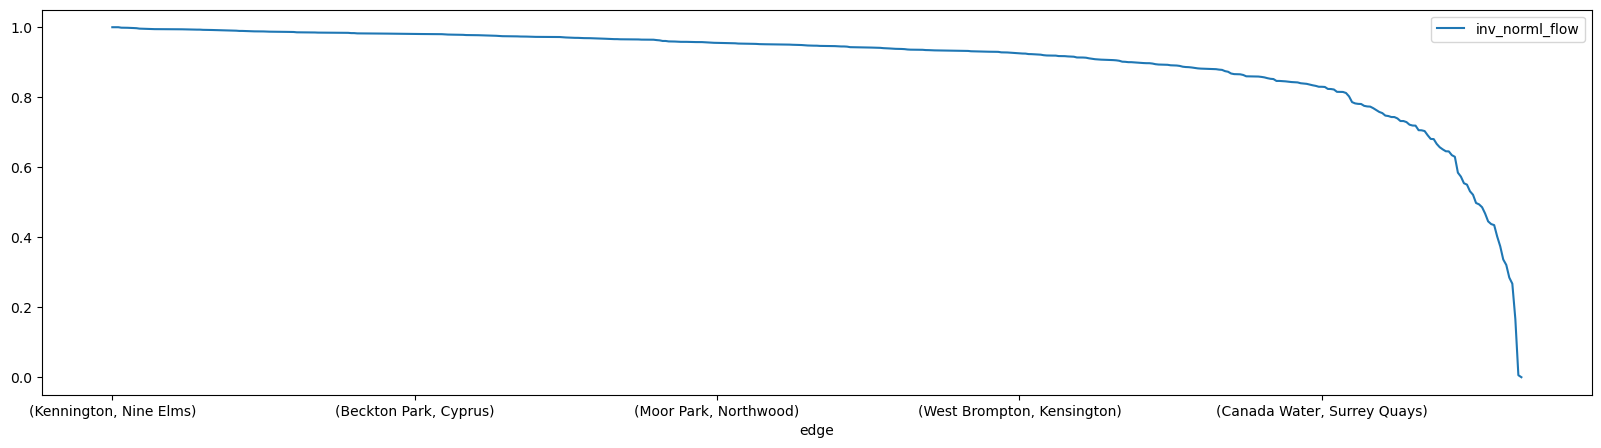

In [67]:
# plot flows dataframe to see the distribution of flows
inv_norml_flow_sorted.plot(x='edge', y='inv_norml_flow', figsize=(20,5))

似乎走向了另一个极端？

In [68]:
# inv_flows = {'edge':[], 'inv_flows':[]}
# # now I want to get all the length value from the edges, and store them in a dictionary
# for edge in G.edges():
#     inv_flows['edge'].append(edge)
#     inv_flows['inv_flows'].append(G.edges[edge]['inv_flows'])

# # create a dataframe from the dictionary
# inv_flows_df = pd.DataFrame(inv_flows)
# inv_flows_df.tail()

In [69]:
# inv_flows_sorted = inv_flows_df.sort_values(["inv_flows"], ascending=False)
# inv_flows_sorted.tail()
# # check一下，inv_flow 越小，站点间距离越近

In [70]:
# # plot flows dataframe to see the distribution of flows
# inv_flows_sorted.plot(x='edge', y='inv_flows', figsize=(20,5))

In [71]:
nx.average_clustering(G, weight='inv_norml_flow')

0.026026967199099162

In [72]:
nx.average_clustering(G)

0.030382377389858686

#### NEW Weighted BetweennessC

In [73]:
# weighted betweenness centrality:
betwn_w = nx.betweenness_centrality(G, weight='inv_norml_flow', normalized=False)
nx.set_node_attributes(G,dict(betwn_w),'betweenness_w')
# add the weighted betweenness centrality as an attribute to the nodes in the graph
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))
df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,degree,degree_n,betweenness,closeness,betweenness_w
Waterloo,0.0150,6,19464.882323,0.112265,52964.00
Westminster,0.0100,4,16226.155916,0.112549,51311.50
Green Park,0.0150,6,17223.622114,0.114778,43849.75
Bank and Monument,0.0200,8,23181.058947,0.113572,36423.75
Stratford,0.0225,9,23768.093434,0.104384,25552.25
Liverpool Street,0.0150,6,21610.387049,0.110254,25282.75
Victoria,0.0100,4,7522.101335,0.108137,21000.00
Euston,0.0125,5,16624.275469,0.109830,20884.00
Sloane Square,0.0050,2,5526.068001,0.101859,18544.00
South Kensington,0.0075,3,7864.667677,0.096852,18476.00


In [74]:
#To know the edges and flows connecting Green Park:
Green = [(u,v,d) for  u,v,d in G.edges(data=True) if "Green Park" in u or "Green Park" in v]
Green

[('Westminster',
  'Green Park',
  {'length': 1423.7801946059371,
   'line_name': 'Jubilee',
   'flows': 179471,
   'inv_norml_flow': 0.1660967}),
 ('Green Park',
  'Bond Street',
  {'length': 1148.912313161808,
   'line_name': 'Jubilee',
   'flows': 128732,
   'inv_norml_flow': 0.401853}),
 ('Green Park',
  'Victoria',
  {'length': 1209.5998088021067,
   'line_name': 'Victoria',
   'flows': 157697,
   'inv_norml_flow': 0.2672685}),
 ('Green Park',
  'Oxford Circus',
  {'length': 1010.5664752575733,
   'line_name': 'Victoria',
   'flows': 134713,
   'inv_norml_flow': 0.3740626}),
 ('Green Park',
  'Hyde Park Corner',
  {'length': 779.8893002669062,
   'line_name': 'Piccadilly',
   'flows': 7418,
   'inv_norml_flow': 0.9655326}),
 ('Green Park',
  'Piccadilly Circus',
  {'length': 777.6260868051102,
   'line_name': 'Piccadilly',
   'flows': 17951,
   'inv_norml_flow': 0.9165915})]

In [75]:
#To know the edges and flows connecting Waterloo:
Waterloo = [(u,v,d) for  u,v,d in G.edges(data=True) if "Waterloo" in u or "Waterloo" in v]
Waterloo

[('Southwark',
  'Waterloo',
  {'length': 656.4269295165401,
   'line_name': 'Jubilee',
   'flows': 68805,
   'inv_norml_flow': 0.6803009}),
 ('Waterloo',
  'Westminster',
  {'length': 850.36002636052,
   'line_name': 'Jubilee',
   'flows': 215218,
   'inv_norml_flow': 0.0}),
 ('Waterloo',
  'Bank and Monument',
  {'length': 2542.954443857111,
   'line_name': 'Waterloo & City',
   'flows': 213985,
   'inv_norml_flow': 0.0057291}),
 ('Waterloo',
  'Embankment',
  {'length': 773.6623015144186,
   'line_name': 'Northern',
   'flows': 17459,
   'inv_norml_flow': 0.9188776}),
 ('Waterloo',
  'Lambeth North',
  {'length': 573.689056175681,
   'line_name': 'Bakerloo',
   'flows': 15112,
   'inv_norml_flow': 0.9297828}),
 ('Waterloo',
  'Kennington',
  {'length': 1760.1985166074573,
   'line_name': 'Northern',
   'flows': 50961,
   'inv_norml_flow': 0.7632122})]

新的Weighted Betweenness Centrality排序发生了很大变化，客流量flow的权重极大影响了各点的中心度。  
Waterloo，Westminster成为前二，这是edge中flow最高的两个站点。Green park的进出流量整体很高，有多个100k+的flows.

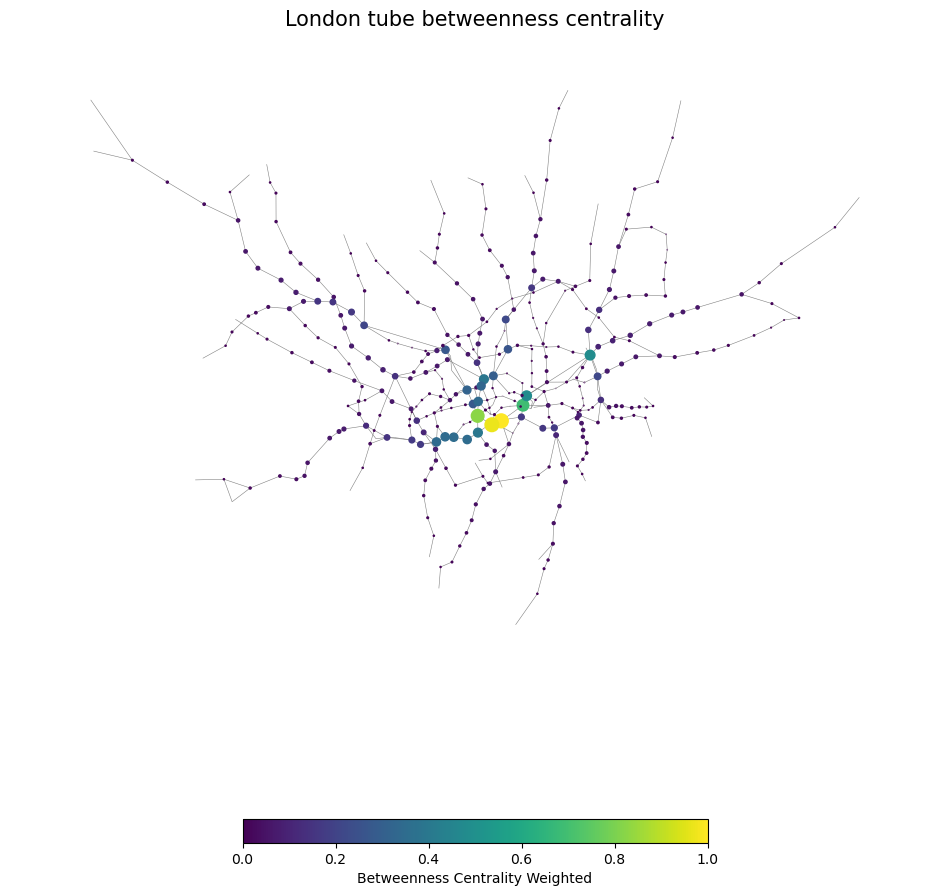

In [76]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph
pos = nx.get_node_attributes(G, 'coords')
pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality Weighted",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.savefig("London tube weighted betweenness centrality.png", format="PNG")
plt.show()

#### NEW Weighted ClosenessC

In [77]:
# weighted betweenness centrality:
clsn_w = nx.closeness_centrality(G, distance='inv_norml_flow')
nx.set_node_attributes(G,dict(clsn_w),'closeness_w')
# add the weighted closeness centrality as an attribute to the nodes in the graph
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))
df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,degree,degree_n,betweenness,closeness,betweenness_w,closeness_w
Green Park,0.0150,6,17223.622114,0.114778,43849.75,0.183433
Westminster,0.0100,4,16226.155916,0.112549,51311.50,0.182554
Waterloo,0.0150,6,19464.882323,0.112265,52964.00,0.182554
Bank and Monument,0.0200,8,23181.058947,0.113572,36423.75,0.182503
Victoria,0.0100,4,7522.101335,0.108137,21000.00,0.178770
Liverpool Street,0.0150,6,21610.387049,0.110254,25282.75,0.177045
Oxford Circus,0.0150,6,4296.746032,0.111204,18168.50,0.176937
Bond Street,0.0100,4,11298.961255,0.110988,14528.50,0.174777
Stratford,0.0225,9,23768.093434,0.104384,25552.25,0.172270
Warren Street,0.0075,3,3414.788889,0.106242,17255.50,0.170441


新的Weighted Betweenness Centrality排序发生了很大变化，客流量flow的权重极大影响了各点的中心度。Green Park因其极高的流量而占据了第一。

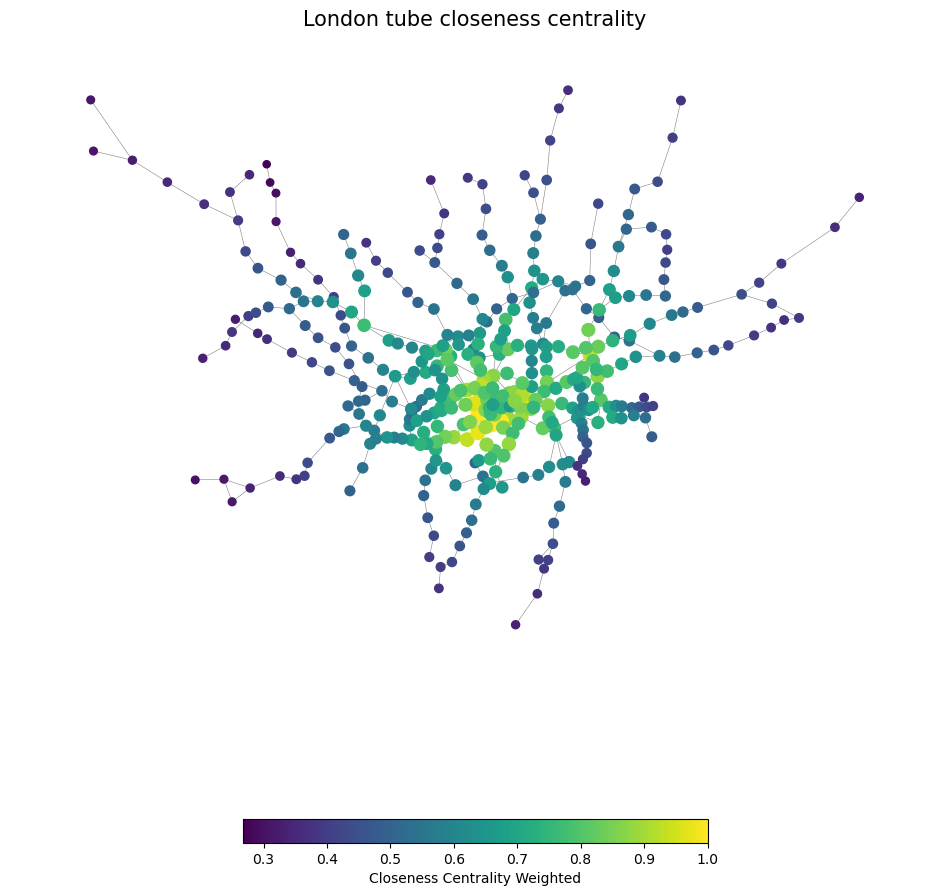

In [78]:
# Lets set colour and size of nodes according to betweenness values
closeness_w_values=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['closeness_w']/max(closeness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['closeness_w']/max(closeness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph
pos = nx.get_node_attributes(G, 'coords')
pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Closeness Centrality Weighted",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality",fontsize=15)
plt.savefig("London tube weighted closeness centrality.png", format="PNG")
plt.show()

## 2.2 Adjust the impact measure when with passengers flow 3'
Now consider the measure for assessing the impact of node removal. Would you adjust the 
measure for a weighted network? If yes, how? Propose a different measure that would be better at 
assessing the impact of closing a station taking into consideration the passengers.

在clustering coefficient的measure中加入权重，这里的算法用的是average clustering coefficient of all the nodes in graph. 在单个节点的聚集系数公式for weighted graph中，权重weight与聚集系数成反比，因此也使用与2.2相同的weight.

本global efficiency 算法在计算shortest path distance时忽略了edge weight, 无法直接加入权重计算。   
由于该值的意义是xxxx, 理论上，我们可以计算weighted shortest path distance, 然后计算距离的倒数the multiplicative inverse of the distance, 再取average，得到新的adjusted measure.  Efficiency 与距离成反比，距离越小，效率越高。所以权重同样使用flow的反比例系数。
参考原公式，仅对d做出调整，reference：@latoraEfficientBehaviorSmallWorld2001.  

不过缺点是small world network. 对伦敦地铁网络适用性？而且原作为什么不增加weighted，有什么考虑吗？


我们还可以考虑用average shortest path length,

从plot中网络性能的降低来看，degree C is the best performing measure，因为它最好地最高效地捕捉了most relevant stations to the vulnerablity of underground.
尽管有点出乎意料，这可能说明，不带权重的betweenness centrality比较弱？...

In [79]:
def weighted_global_efficiency(G):
    """计算网络中节点之间加权最短路径距离的倒数的平均值-weight专门定义版"""
    N = len(G)
    sum_inv_dist = 0
    num_pairs = 0
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                try:
                    # 计算节点间的加权最短路径距离
                    distance = nx.dijkstra_path_length(G, i, j, weight='inv_norml_flow')
                    # 计算乘法逆multiplicative inverse
                    inverse = 1 / distance
                    sum_inv_dist += inverse
                    num_pairs += 1
                except:
                    # Returns 0 if no path between nodes.
                    inverse = 0
                    num_pairs += 1
    return sum_inv_dist / (N*(N-1))  #N*(N-1)/2 是可能存在的最大路径数


In [80]:
def topo_global_efficiency(G):
    """计算网络中节点之间最短路径距离的倒数的平均值"""
    N = len(G)
    sum_inv_dist = 0
    num_pairs = 0
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                try:
                    # 计算节点间的加权最短路径距离
                    distance = nx.dijkstra_path_length(G, i, j)
                    # 计算乘法逆
                    inverse = 1 / distance
                    sum_inv_dist += inverse
                    num_pairs += 1
                except:
                    # Returns 0 if no path between nodes.
                    inverse = 0
                    num_pairs += 1
    return sum_inv_dist / (N*(N-1))


## 2.3 remove nodes and evaluate the impact using adjusted measure. 8'
Critically discuss which station closure will have the largest impact on passengers, referring to your measures and results.

### adjust 2 measures-Weighted 

In [81]:
e = weighted_global_efficiency(G)
e

0.14643256695751683

In [82]:
# 创建dictionary，储存原始网络的系数
original_network_new = {'removed_node': ['None'], 'number_of_removed_nodes':[0],'clustering_coefficient': [nx.average_clustering(G,weight='inv_norml_flow')],'global_efficiency': [e]}
print(original_network_new)


{'removed_node': ['None'], 'number_of_removed_nodes': [0], 'clustering_coefficient': [0.026026967199099162], 'global_efficiency': [0.14643256695751683]}


#### **A) Non-Sequential removal strategy**

#### **B) Sequential removal strategy**

In [83]:
num_nodes_removed = 0
results = {'removed_node': [],'number_of_removed_nodes':[], 'clustering_coefficient': [],'global_efficiency': []}

# 创建原始网络的副本
G_copy = G.copy()

while num_nodes_removed < 10 and len(top_nodes) > 0:
    # 计算 degree centrality，排序，取前十个节点
    degree = nx.degree_centrality(G_copy)
    sorted_degree_centrality = sorted(degree.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_degree_centrality]
    # print(top_nodes[:10])
    # 移除第一个节点
    node_to_remove = top_nodes.pop(0)
    G_copy.remove_node(node_to_remove) 
    # 重新计算degree centrality和系数
    degree_centrality_new = nx.degree_centrality(G_copy)
    sorted_degree_centrality_new = sorted(degree_centrality_new.items(), key=lambda x: x[1], reverse=True)
    top_nodes = [node[0] for node in sorted_degree_centrality_new]
    global_efficiency_new = weighted_global_efficiency(G_copy)
    clustering_coefficient_new = nx.average_clustering(G_copy,weight='inv_norml_flow')
    # 储存结果到dictionary
    results['removed_node'].append(node_to_remove)
    results['clustering_coefficient'].append(clustering_coefficient_new)
    results['global_efficiency'].append(global_efficiency_new)
    results['number_of_removed_nodes'].append(num_nodes_removed+1)
    # print移除节点后的结果
    # print("New Sorted Degree centrality ranking:", sorted_degree_centrality_new[:10])
    # print("there are %d nodes left" % (len(G_copy.nodes())))
    num_nodes_removed += 1

results_df_new2 = pd.DataFrame(results)
# join the orginal network results with the new results
results_df_new2 = pd.concat([pd.DataFrame(original_network_new), results_df_new2], ignore_index=True)
print(results_df_new2)
# 保存结果为csv
results_df_new2.to_csv('new_impact_degreeC_seq.csv', index=False)

                removed_node  number_of_removed_nodes  clustering_coefficient  \
0                       None                        0                0.026027   
1                  Stratford                        1                0.026212   
2          Bank and Monument                        2                0.025867   
3               Baker Street                        3                0.023109   
4   King's Cross St. Pancras                        4                0.023313   
5               Canning Town                        5                0.020738   
6                 Green Park                        6                0.020066   
7               Earl's Court                        7                0.014205   
8                   Waterloo                        8                0.014241   
9         Willesden Junction                        9                0.014277   
10             Turnham Green                       10                0.011317   

    global_efficiency  
0  

In [84]:
nx.average_clustering(G_copy,weight='inv_norml_flow')

0.011316695750557522

### Plot

#### Names

In [85]:
# 获取一个list of removed nodes
xlabel_name = results_df_new2['removed_node'].tolist()
print(xlabel_name)

['None', 'Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", 'Canning Town', 'Green Park', "Earl's Court", 'Waterloo', 'Willesden Junction', 'Turnham Green']


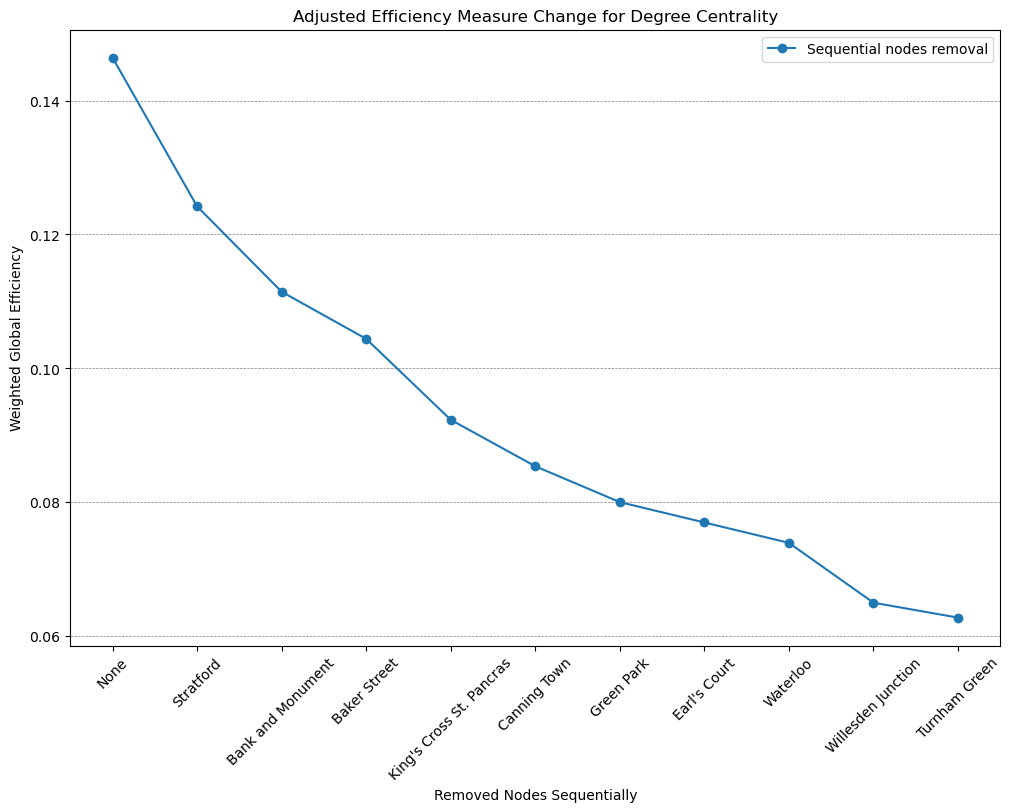

In [86]:
# global efficiency
fig, ax = plt.subplots(figsize=(12,8))

# results_df_new.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency', label='Non-sequential nodes removal', marker='o')
results_df_new2.plot(ax=ax,x='number_of_removed_nodes', y='global_efficiency',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('Removed Nodes Sequentially')
ax.set_ylabel('Weighted Global Efficiency')
ax.set_title('Adjusted Efficiency Measure Change for Degree Centrality')

# Set the x-tick labels
plt.xticks(results_df['number_of_removed_nodes'], xlabel_name)
# 设置X轴标签旋转角度和对齐方式
plt.tick_params(axis='x', labelrotation=45, labelright=True)
plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/new_degree_global_efficiency2.png',dpi=300, bbox_inches='tight')
plt.show()

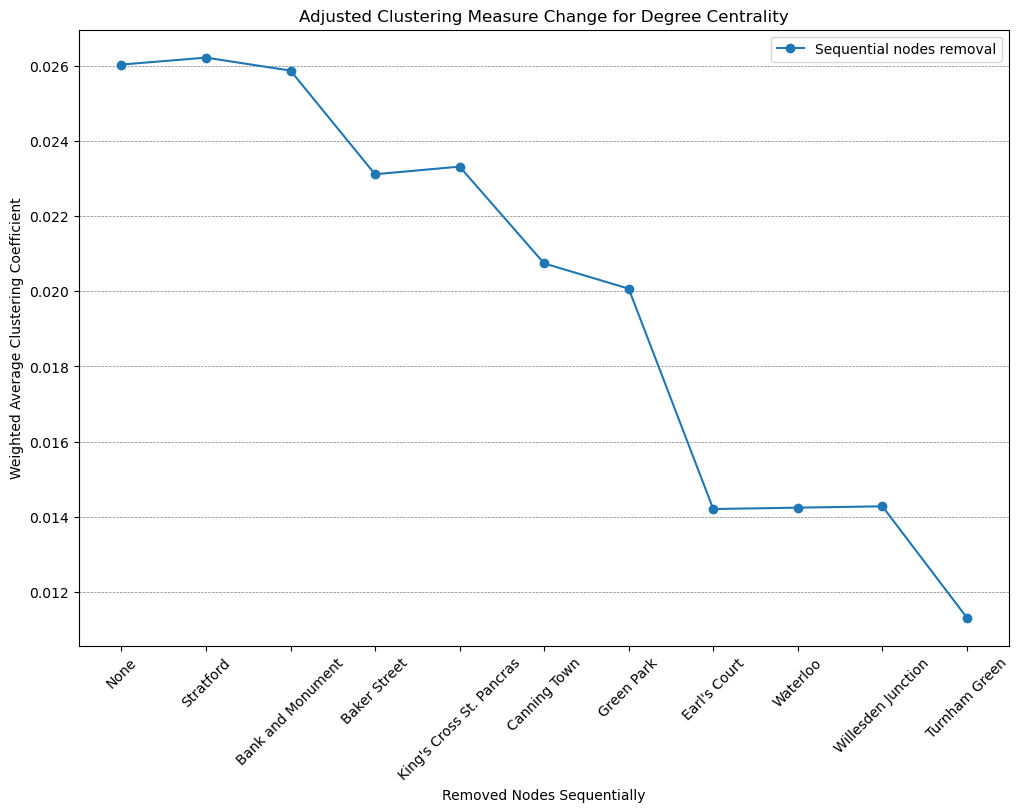

In [87]:
# clustering coefficient
fig, ax = plt.subplots(figsize=(12,8))

# results_df_new.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient', label='Non-sequential nodes removal', marker='o')
results_df_new2.plot(ax=ax,x='number_of_removed_nodes', y='clustering_coefficient',label='Sequential nodes removal', marker='o')

ax.legend(loc='best')
ax.set_xlabel('Removed Nodes Sequentially')
ax.set_ylabel('Weighted Average Clustering Coefficient')
ax.set_title('Adjusted Clustering Measure Change for Degree Centrality')

# Set the x-tick labels
plt.xticks(results_df['number_of_removed_nodes'], xlabel_name)
# 设置X轴标签旋转角度和对齐方式
plt.tick_params(axis='x', labelrotation=45, labelright=True)
plt.grid(True,axis='y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig('./img/new_degree_clustering_coeff2.png',dpi=300, bbox_inches='tight')
plt.show()

不论从sequential 还是non-sequential的策略，Earl's Court竟然都是对clustering measure影响最显著地大的车站。  
猜想：可能经过前面多个车站的失效，在这一点damage后，网络发生了较大的断裂？  
looking at the data of Earl's Court... 看不出来，很正常，可能得看看它的centrality.

In [88]:
# To check the attributes of a node names 'Baker Street':
G.nodes["Earl's Court"]
# list(G.nodes(data = True))[]

{'coords': (525466.7699525921, 178494.18714144814),
 'degree': 0.015,
 'degree_n': 6,
 'betweenness': 10046.20775613276,
 'closeness': 0.09041591320072333,
 'betweenness_w': 18398.0,
 'closeness_w': 0.14761101188221626}

In [89]:
#To know the edges and flows connecting Earl's court:
Earl = [(u,v,d) for  u,v,d in G.edges(data=True) if "Earl's Court" in u or "Earl's Court" in v]
Earl

[('Gloucester Road',
  "Earl's Court",
  {'length': 910.1212138492417,
   'line_name': 'Piccadilly',
   'flows': 89435,
   'inv_norml_flow': 0.5844446}),
 ('High Street Kensington',
  "Earl's Court",
  {'length': 1300.860111181753,
   'line_name': 'District',
   'flows': 16874,
   'inv_norml_flow': 0.9215958}),
 ('West Brompton',
  "Earl's Court",
  {'length': 567.3891917631418,
   'line_name': 'District',
   'flows': 33832,
   'inv_norml_flow': 0.8428013}),
 ('Kensington',
  "Earl's Court",
  {'length': 1546.6911759759541,
   'line_name': 'District',
   'flows': 14581,
   'inv_norml_flow': 0.9322501}),
 ("Earl's Court",
  'West Kensington',
  {'length': 944.0652943049492,
   'line_name': 'District',
   'flows': 3196,
   'inv_norml_flow': 0.9851499}),
 ("Earl's Court",
  'Barons Court',
  {'length': 1504.7980653624195,
   'line_name': 'Piccadilly',
   'flows': 66421,
   'inv_norml_flow': 0.691378})]

In [90]:
G1 = nx.Graph([(0, 1), (1, 2), (5, 6), (3, 4)])
print(nx.number_connected_components(G1))
nx.efficiency(G1, 2, 3)  # this gives efficiency for node 2 and 3


3


0

In [91]:
nx.global_efficiency(G1)  # this gives efficiency for the whole network

0.21428571428571427

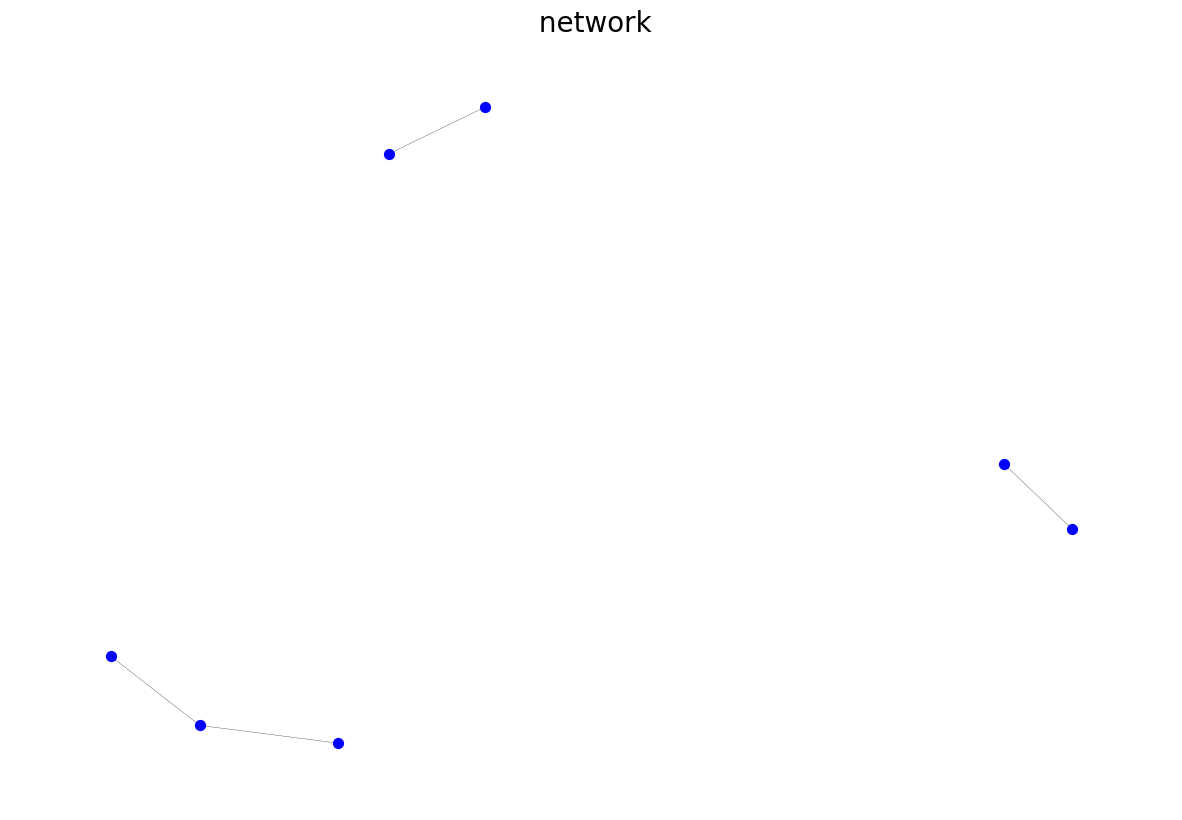

In [92]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(15,10))

pos = nx.spring_layout(G1, k=0.5, iterations=50)

nx.draw_networkx_nodes(G1,pos=pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G1,pos=pos,arrows=False,width=0.2)
# nx.draw_networkx_labels(G,node_labels, font_size=5, font_color='black')

plt.title(" network",fontsize=20)
plt.axis("off")
plt.show()
